# Part 2
## Introduction — make all the preprocessing staff from the previous lesson

In [179]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures


import warnings
warnings.filterwarnings("ignore")

In [180]:
src_train_file = "../data/train.json"
src_test_file = "../data/test.json"

In [181]:
df_train = pd.read_json(src_train_file)
df_train = df_train[['price', 'bathrooms', 'bedrooms', 'interest_level', 'features']]

df_test = pd.read_json(src_test_file)

In [182]:
df_train

,price,bathrooms,bedrooms,interest_level,features
4,2400,1.0,1,medium,"[Dining Room, Pre-War, Laundry in Building, Di..."
6,3800,1.0,2,low,"[Doorman, Elevator, Laundry in Building, Dishw..."
9,3495,1.0,2,medium,"[Doorman, Elevator, Laundry in Building, Laund..."
10,3000,1.5,3,medium,[]
15,2795,1.0,0,low,"[Doorman, Elevator, Fitness Center, Laundry in..."
...,...,...,...,...,...
124000,2800,1.0,3,low,"[Elevator, Dishwasher, Hardwood Floors]"
124002,2395,1.0,2,medium,"[Common Outdoor Space, Cats Allowed, Dogs Allo..."
124004,1850,1.0,1,medium,"[Dining Room, Elevator, Pre-War, Laundry in Bu..."
124008,4195,1.0,2,medium,"[Pre-War, Laundry in Unit, Dishwasher, No Fee,..."


In [183]:
df_test

,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address
0,1.0,1,79780be1514f645d7e6be99a3de696c5,2016-06-11 05:29:41,Large with awesome terrace--accessible via bed...,Suffolk Street,"[Elevator, Laundry in Building, Laundry in Uni...",40.7185,7142618,-73.9865,b1b1852c416d78d7765d746cb1b8921f,[https://photos.renthop.com/2/7142618_1c45a2c8...,2950,99 Suffolk Street
1,1.0,2,0,2016-06-24 06:36:34,Prime Soho - between Bleecker and Houston - Ne...,Thompson Street,"[Pre-War, Dogs Allowed, Cats Allowed]",40.7278,7210040,-74.0000,d0b5648017832b2427eeb9956d966a14,[https://photos.renthop.com/2/7210040_d824cc71...,2850,176 Thompson Street
2,1.0,0,0,2016-06-17 01:23:39,Spacious studio in Prime Location. Cleanbuildi...,Sullivan Street,"[Pre-War, Dogs Allowed, Cats Allowed]",40.7260,7174566,-74.0026,e6472c7237327dd3903b3d6f6a94515a,[https://photos.renthop.com/2/7174566_ba3a35c5...,2295,115 Sullivan Street
3,1.0,2,f9c826104b91d868e69bd25746448c0c,2016-06-21 05:06:02,For immediate access call Bryan.<br /><br />Bo...,Jones Street,"[Hardwood Floors, Dogs Allowed, Cats Allowed]",40.7321,7191391,-74.0028,41735645e0f8f13993c42894023f8e58,[https://photos.renthop.com/2/7191391_8c2f2d49...,2900,23 Jones Street
5,1.0,1,81062936e12ee5fa6cd2b965698e17d5,2016-06-16 07:24:27,Beautiful TRUE 1 bedroom in a luxury building ...,Exchange Place,"[Roof Deck, Doorman, Elevator, Fitness Center,...",40.7054,7171695,-74.0095,a742cf7dd3b2627d83417bc3a1b3ec96,[https://photos.renthop.com/2/7171695_089ffee2...,3254,20 Exchange Place
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124003,1.0,1,bd863d28a6b119ac3bc72d5f27b07f24,2016-04-26 16:09:55,BRAND NEW TO MARKET 1BDR \r107TH AND LEXINGTON...,150 EAST 107TH STREET,[],40.7925,6928108,-73.9454,453d46f8113e1f2c730c2ee5a4469c71,[https://photos.renthop.com/2/6928108_231eb983...,1700,158 EAST 107TH STREET
124005,1.0,2,9174b75c0cd978eb0e5aa93afbad754b,2016-04-21 05:06:19,Convertible 2BR apartment features a brand new...,E 33rd St.,"[Doorman, Elevator, Laundry in Building, Dishw...",40.7456,6906674,-73.9797,2983e45f7e0ad87d677dacd13e362785,[https://photos.renthop.com/2/6906674_9fe899a8...,4195,141 E 33rd St.
124006,1.0,0,0,2016-04-20 01:31:52,"Let's get you in to see this $2,400/mo, recent...",Lexington Avenue,"[Dogs Allowed, Cats Allowed]",40.7416,6897967,-73.9829,e6472c7237327dd3903b3d6f6a94515a,[],2400,95 Lexington Avenue
124007,2.0,2,c90c010e5505365676538e64d02aa1e0,2016-04-08 02:26:45,CooperCooper.com :: Web ID #171357; Access 100...,Park Avenue,"[Doorman, Elevator, Cats Allowed, Dogs Allowed]",40.7485,6842183,-73.9800,6e5c10246156ae5bdcd9b487ca99d96a,[https://photos.renthop.com/2/6842183_b1fe51f4...,6895,41 Park Avenue


In [184]:
# избавляемся от выбросов в целевой переемнной
low_quantile = df_train['price'].quantile(0.01)
up_quantile = df_train['price'].quantile(0.99)
df_train = df_train[(df_train['price'] > low_quantile)&(df_train['price'] < up_quantile)]

# кодируем категориальную переменную interest_level
code = {'low': 0, 'medium':1, 'high':2}
df_train['interest_level'] = df_train['interest_level'].map(code)

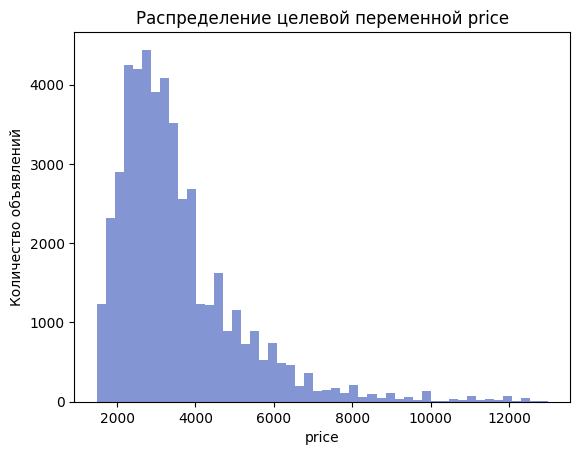

In [185]:
plt.hist(df_train['price'], bins=50, color="#8495d4")
plt.xlabel('price')
plt.ylabel('Количество объявлений')
plt.title('Распределение целевой переменной price')
plt.show()

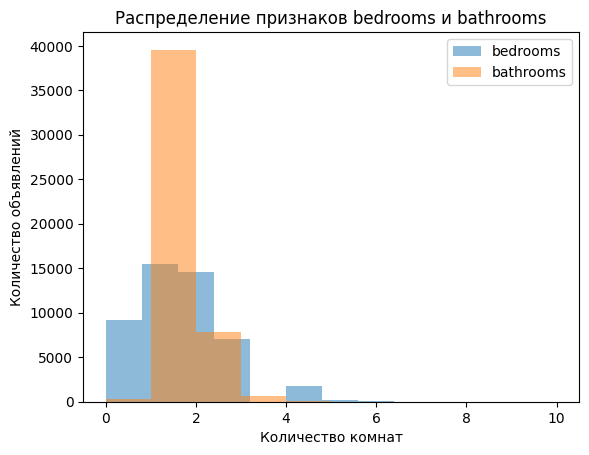

In [186]:
plt.hist(df_train["bedrooms"], alpha=0.5, label='bedrooms')
plt.hist(df_train["bathrooms"], alpha=0.5, label='bathrooms')
plt.title('Распределение признаков bedrooms и bathrooms')
plt.xlabel('Количество комнат')
plt.ylabel('Количество объявлений')
plt.legend()
plt.show()

In [187]:
X = df_train[['bathrooms', 'bedrooms', 'interest_level']]
y = df_train['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

# Part 3


Remove unused symbols ([,], ', ", and space) from the column. Get all values in each list and collect the result in one huge list for the whole dataset. You can use DataFrame.iterrows().

In [188]:
df_train

,price,bathrooms,bedrooms,interest_level,features
4,2400,1.0,1,1,"[Dining Room, Pre-War, Laundry in Building, Di..."
6,3800,1.0,2,0,"[Doorman, Elevator, Laundry in Building, Dishw..."
9,3495,1.0,2,1,"[Doorman, Elevator, Laundry in Building, Laund..."
10,3000,1.5,3,1,[]
15,2795,1.0,0,0,"[Doorman, Elevator, Fitness Center, Laundry in..."
...,...,...,...,...,...
124000,2800,1.0,3,0,"[Elevator, Dishwasher, Hardwood Floors]"
124002,2395,1.0,2,1,"[Common Outdoor Space, Cats Allowed, Dogs Allo..."
124004,1850,1.0,1,1,"[Dining Room, Elevator, Pre-War, Laundry in Bu..."
124008,4195,1.0,2,1,"[Pre-War, Laundry in Unit, Dishwasher, No Fee,..."


In [189]:
tags = []
for index, row in df_train.iterrows():
    temp = str(row["features"]).replace("[", "").replace("]", "").replace("'", "").replace('"', "").replace(' ', "")
    df_train.loc[index, "features"] = temp
    for t in temp.split(","):
        if len(t) != 0:
            tags.append(t)
len(tags)

262377

How many unique values does a result list contain?

In [190]:
tags_uniq = set(tags)
print(len(tags_uniq))

1529


Count the most popular functions from our huge list and take the top 20 for this moment.

In [191]:
counter = Counter(tags)
top_20 = counter.most_common(20)
print(top_20)

[('Elevator', 25375), ('HardwoodFloors', 23146), ('CatsAllowed', 23135), ('DogsAllowed', 21652), ('Doorman', 20479), ('Dishwasher', 20081), ('NoFee', 17793), ('LaundryinBuilding', 16082), ('FitnessCenter', 12989), ('Pre-War', 8971), ('LaundryinUnit', 8437), ('RoofDeck', 6417), ('OutdoorSpace', 5132), ('DiningRoom', 4890), ('HighSpeedInternet', 4223), ('Balcony', 2898), ('SwimmingPool', 2643), ('LaundryInBuilding', 2564), ('NewConstruction', 2504), ('Terrace', 2177)]


Now create 20 new features based on the top 20 values: 1 if the value is in the "Feature" column, otherwise 0.

In [192]:
new_features = []
for item in top_20:
    new_features.append(item[0])

In [193]:
for feature in new_features:
    df_train[feature] = None

In [194]:
for index, row in df_train.iterrows():
    for f in new_features:
        if f in row["features"]:
            df_train.loc[index, f] = 1
        else:
            df_train.loc[index, f] = 0


In [195]:
df_train

,price,bathrooms,bedrooms,interest_level,features,Elevator,HardwoodFloors,CatsAllowed,DogsAllowed,Doorman,...,LaundryinUnit,RoofDeck,OutdoorSpace,DiningRoom,HighSpeedInternet,Balcony,SwimmingPool,LaundryInBuilding,NewConstruction,Terrace
4,2400,1.0,1,1,"DiningRoom,Pre-War,LaundryinBuilding,Dishwashe...",0,1,1,1,0,...,0,0,0,1,0,0,0,0,0,0
6,3800,1.0,2,0,"Doorman,Elevator,LaundryinBuilding,Dishwasher,...",1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9,3495,1.0,2,1,"Doorman,Elevator,LaundryinBuilding,LaundryinUn...",1,1,0,0,1,...,1,0,0,0,0,0,0,0,0,0
10,3000,1.5,3,1,,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15,2795,1.0,0,0,"Doorman,Elevator,FitnessCenter,LaundryinBuilding",1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124000,2800,1.0,3,0,"Elevator,Dishwasher,HardwoodFloors",1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
124002,2395,1.0,2,1,"CommonOutdoorSpace,CatsAllowed,DogsAllowed,NoF...",1,0,1,1,1,...,0,0,1,0,0,0,0,1,0,0
124004,1850,1.0,1,1,"DiningRoom,Elevator,Pre-War,LaundryinBuilding,...",1,1,1,1,0,...,1,0,0,1,0,0,0,0,0,0
124008,4195,1.0,2,1,"Pre-War,LaundryinUnit,Dishwasher,NoFee,Outdoor...",0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0


In [196]:
df = df_train.copy()
df_train = df.drop(columns=["interest_level", "features"])
features_list = df_train.columns    # кроме price


In [197]:
df_train

,price,bathrooms,bedrooms,Elevator,HardwoodFloors,CatsAllowed,DogsAllowed,Doorman,Dishwasher,NoFee,...,LaundryinUnit,RoofDeck,OutdoorSpace,DiningRoom,HighSpeedInternet,Balcony,SwimmingPool,LaundryInBuilding,NewConstruction,Terrace
4,2400,1.0,1,0,1,1,1,0,1,0,...,0,0,0,1,0,0,0,0,0,0
6,3800,1.0,2,1,1,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
9,3495,1.0,2,1,1,0,0,1,1,0,...,1,0,0,0,0,0,0,0,0,0
10,3000,1.5,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15,2795,1.0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124000,2800,1.0,3,1,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
124002,2395,1.0,2,1,0,1,1,1,0,1,...,0,0,1,0,0,0,0,1,0,0
124004,1850,1.0,1,1,1,1,1,0,1,1,...,1,0,0,1,0,0,0,0,0,0
124008,4195,1.0,2,0,0,0,0,0,1,1,...,1,0,1,0,0,0,0,0,0,0


Уточним object-type коолонки (для вычисления опт параметров)

In [198]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48343 entries, 4 to 124009
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   price              48343 non-null  int64  
 1   bathrooms          48343 non-null  float64
 2   bedrooms           48343 non-null  int64  
 3   interest_level     48343 non-null  int64  
 4   features           48343 non-null  object 
 5   Elevator           48343 non-null  object 
 6   HardwoodFloors     48343 non-null  object 
 7   CatsAllowed        48343 non-null  object 
 8   DogsAllowed        48343 non-null  object 
 9   Doorman            48343 non-null  object 
 10  Dishwasher         48343 non-null  object 
 11  NoFee              48343 non-null  object 
 12  LaundryinBuilding  48343 non-null  object 
 13  FitnessCenter      48343 non-null  object 
 14  Pre-War            48343 non-null  object 
 15  LaundryinUnit      48343 non-null  object 
 16  RoofDeck           48343 n

In [199]:
for c in df.columns:
    if (c != "price" and c!= "bathrooms" and c!= "bedrooms" and c != "interest_level" and c != "features"):
        df[c] = df[c].astype(int)

In [200]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48343 entries, 4 to 124009
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   price              48343 non-null  int64  
 1   bathrooms          48343 non-null  float64
 2   bedrooms           48343 non-null  int64  
 3   interest_level     48343 non-null  int64  
 4   features           48343 non-null  object 
 5   Elevator           48343 non-null  int64  
 6   HardwoodFloors     48343 non-null  int64  
 7   CatsAllowed        48343 non-null  int64  
 8   DogsAllowed        48343 non-null  int64  
 9   Doorman            48343 non-null  int64  
 10  Dishwasher         48343 non-null  int64  
 11  NoFee              48343 non-null  int64  
 12  LaundryinBuilding  48343 non-null  int64  
 13  FitnessCenter      48343 non-null  int64  
 14  Pre-War            48343 non-null  int64  
 15  LaundryinUnit      48343 non-null  int64  
 16  RoofDeck           48343 n

In [201]:
X = df.drop(["price", "features"], axis=1)
Y = df["price"]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=21, test_size=0.2)

# без переноса старого индекса 
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
Y_train = Y_train.reset_index(drop=True)
Y_test = Y_test.reset_index(drop=True)

In [202]:
X_test

,bathrooms,bedrooms,interest_level,Elevator,HardwoodFloors,CatsAllowed,DogsAllowed,Doorman,Dishwasher,NoFee,...,LaundryinUnit,RoofDeck,OutdoorSpace,DiningRoom,HighSpeedInternet,Balcony,SwimmingPool,LaundryInBuilding,NewConstruction,Terrace
0,1.0,1,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
1,2.0,2,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.0,1,0,1,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,1.5,1,0,1,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
4,3.0,3,0,1,1,1,1,1,1,1,...,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9664,2.0,3,0,1,0,1,1,1,0,1,...,0,0,1,0,0,0,0,1,0,0
9665,1.0,0,0,1,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
9666,1.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9667,1.0,2,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Part 4


*в дальнейшем $\theta$ и $(w_0, w_1, ..., w_n)$ - будут обозначать одно и то же (параметры модели), но мне лень все под одно название редактировать, так как в источниках встречаются оба варианта и лично мне удобен вариант с w

Implement a Python class for a linear regression algorithm with two basic methods — fit and predict. Use stochastic gradient descent (SGD) to find optimal model weights. For better understanding, we recommend implementing separate versions of the algorithm with the analytical solution and non-stochastic gradient descent under the hood.

Из предыдущих заданий было выяснено
$$
\begin{align*}
\textit{W}_{opt} = (X^TX)^{-1}X^TY \\
\end{align*}
$$

## Сделаем сначала регрессию без численных методов, а просто аналитически

In [203]:
class Linear_Regression_Analytical:
    def __init__(self):
        self.ws = None        # коэффициенты регресии
        self.w0 = None      # нудевой коэффициент intercept_

    def fit(self, X_train, Y_train):
        """
        оптимальные параметры 
        W = (xTx)^-1xTY
        чтобы не реализовывать мат операции над матрицами, 
        воспользуемся numpy
        """
        X = X_train.copy()
        Y = Y_train.copy()
        X.insert(0, "x0", np.ones((X.shape[0], 1)))           # вставляем столбец для w0
        self.ws = (X.T) @ X
        self.ws = np.linalg.inv(self.ws)
        self.ws = self.ws @ (X.T) @ Y

        self.w0 = self.ws[0].tolist()  # для избавления от индексов
        self.ws = self.ws[1:].tolist()
        
        
    def predict(self, X_test):

        if (self.w0 is None) or (self.ws is None):
            raise TypeError("нужно сначала обучить модель - коэффициенты Wi не известны")
        
        preds = []  # Y_test
        for row in range(len(X_test)):  # проходимся по строкам
            pred = self.w0
            try:
                for col in range(len(X_test.columns)): # проходимся по X_test[row][col] 
                    # self
                    pred += self.ws[col] * X_test.iloc[row, col]    # wi * xi
                preds.append(pred)
            except KeyError:
                print("-----")
                print(row, col)
                print(X_test.iloc[row, col])
                print(self.ws[col])
                print("-----")
        return pd.Series(preds)
            


In [204]:
an_lr = Linear_Regression_Analytical()
an_lr.fit(X_train, Y_train)

In [205]:
print(an_lr.ws)
print(an_lr.w0)

[1489.8887068851157, 480.44510716050627, -422.5761870531272, 219.1080798459082, -120.06228948412887, -49.345015478351314, 114.49459382382614, 544.1216456274514, 159.37289949642974, -95.68034803517168, -194.04943886907031, 221.70372332039562, -50.215983438265525, 438.2015949031422, -115.05117812127342, -68.3125834526347, 118.3511891917202, -190.0254960300245, -54.51833401202828, 42.47205933883092, -172.96003166229713, -91.4501930532432, 167.36259351012453]
805.9682532914134


In [206]:
pred_an_lr = an_lr.predict(X_test)


## Теперь реализация регресии с численными методами

Градиентный спуск, где функция минимизируется
\begin{align}
\sum_{i=1}^n {L(y_i, f(x_i, \theta))} \to min 
\end{align}

происходит итеративный процесс уменьшения аргумента
$$
\begin{align*}
\textit{x}_{k+1} = x_k - \beta*gradL \\ 
\beta - спуск
\end{align*}

$$

Критерий остановки был выбран:
$$
\begin{align*}
\textit|{w}_{k+1}-{w}_{k}| <= \varepsilon  \\
\varepsilon - точность
\end{align*}
$$


<pre>Судя по реализации линейной регресии в sklearn, функция ошибки берется как сумма квадратов разниц предсказания и реальным ответом (MSE) </pre>
<pre>LinearRegression fits a linear model with coefficients w = (w1, …, wp) to minimize the residual sum of squares between 
the observed targets in the dataset, and the targets predicted by the linear approximation.</pre>
*[Документация Skicit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)


\begin{align*}
\sum_{i=1}^n ({y_i - f(x_i, \theta)})^2 \to min 
\end{align*}

In [207]:
def create_grad(X, Y, w):
    """
    Функция вычисления градиента функции ошибки в конкретном состоянии X (без усреднения)
    w = w0, w1, ..., wm или без w0
    len(X.columns) = len(w)
    return: grad (np.array)
    """
    # так как градиент функции ошибки - это  m-мерная точка для объектов i = 1,...,n
    # m - колоичество признаков
    # n - количество записей
    # то создадим вектор 1 на m

    n = len(X)
    m = len(w)
    grad = np.zeros(m)


    for i in range(n):
        
        pred = 0
        # градиент вычисляется по всем наблюдениям
        for j in range(m):
            pred += w[j]*X.iloc[i, j]

        error = Y.iloc[i] - pred

        for j in range(m):
            grad[j] += -2 * (error) * (X.iloc[i, j])

    grad /= n       # усреднение градиента по количеству наблюдений от выбросов

    return grad



What is determenistic model? Make SGD determenistic.

В контексте градиентного спуска, детерминированность приводится сходимостью метода (для упрощения можно вести лимит по итерациям)

In [208]:
def current_stop_rule(w_curr, w_prev, e=0.000001):
        """Критерий остановки"""
        norma = 0
        for diff in (w_prev - w_curr):
                norma += diff*diff
        return norma**0.5 <= e
        

In [209]:
def Gradient(X, Y, W0, gradient, stop_rule, B=0.1, e=0.000001, **kwargs):
    """
    Градиентныый спуск для минимизации (используется антиградиент)
    W0 : параметры w на начальной итерации 0    np.array
    gradient: градиент функции
    stop_rule: критерий остановки
    **kwargs - для alpha и lambda_ в случае регуляризации

    подразумевается, что len(w) = len(X.columns)    то есть уже учтен или нет intercept
    """
    w_curr = W0
    w_next = w_curr - B*gradient(X=X, Y=Y, w=w_curr, **kwargs)
    #MAX_ITER = 1000     # может долго выполняться
    MAX_ITER = 10
    iter = 0

    while (stop_rule(w_curr=w_next, w_prev=w_curr, e=e) == False) and (iter <= MAX_ITER):
        #print(f"({iter}) Wk+1 = {w_next}   wk = {w_curr}\n")
        w_curr = w_next.copy()
        w_next = w_curr - B*gradient(X=X, Y=Y, w=w_curr)  # анти-градиент
        iter += 1

    return w_next,  X @ w_next   # (w*, f(w*))


In [210]:
class Linear_Regression_Gradient:
    def __init__(self, fit_intercept: bool = True):
        self.ws = None
        self.w0 = None
        self.intercept = fit_intercept      # включать ли w0

    def fit(self, X_train, Y_train, eps = 0.000001, B = 0.00001):
        """eps, B: параметры градиентного спуска
        """
        X = X_train.copy()
        Y = Y_train.copy()
        
        # высчитаем веса уравнения
        if self.intercept:  # включить x0 для w0
            X.insert(0, "x0", np.ones((X.shape[0], 1)))

        w0 = np.zeros(len(X.columns))       # для нормализованных признаков можно взять нудевые
        opt_w, y_train = Gradient(X, Y, w0, gradient=create_grad, stop_rule=current_stop_rule)

        if self.intercept:
            self.w0 = opt_w[0]
            self.ws = opt_w[1:]
        else:
            self.w0 = 0
            self.ws = opt_w

        return y_train

        
    def predict(self, X_test):
        if (self.w0 is None) or (self.ws is None):
            raise TypeError("нужно сначала обучить модель - коэффициенты Wi не известны")
        preds = []  # Y_test

        for i in range(len(X_test)):
            if self.intercept:
                equation = self.w0
            else:
                equation = 0

            for j in range(len(X_test.columns)):
                equation += self.ws[j] * X_test.iloc[i, j]
            
            preds.append(equation)

        return pd.Series(preds)

In [211]:
# лин регрессия с аналитическим решением
an_lr = Linear_Regression_Analytical()
an_lr.fit(X_train, Y_train)
pred_an_lr = an_lr.predict(X_test)

In [212]:
# лин регрессия с градиентным спуском
my_lr = Linear_Regression_Gradient(fit_intercept=True)
my_lr.fit(X_train, Y_train, eps=0.001, B=0.00001)


0        3315.613815
1        3031.950128
2        4047.198472
3        5196.617071
4        3143.083225
            ...     
38669    4803.857682
38670    6725.576265
38671    3743.794878
38672    2744.075605
38673    2005.549552
Length: 38674, dtype: float64

In [213]:
pred_lr_gr = my_lr.predict(X_test)

In [214]:
pred_lr_gr

0       2604.968529
1       4175.494776
2       3074.190150
3       3628.770260
4       7317.529421
           ...     
9664    5895.776635
9665    2566.665590
9666    2382.638151
9667    3177.416678
9668    2651.759067
Length: 9669, dtype: float64

In [215]:
# оригинальная лин регрессия из sklearn
orig_lr = LinearRegression(fit_intercept=True)
orig_lr.fit(X_train, Y_train)
pred_orig_lr = orig_lr.predict(X_test)

## R2 cofficient

Коэффициент R2 (коэффициент детерминации) — это один  показателей качества модели линейной регрессии. Он показывает, насколько хорошо модель объясняет вариацию целевой переменной.
* R^2 = 1  модель идеально предсказывает все значения
* R^2 = 0  модель не лучше, чем простое среднее
* R^2 < 0  модель даже хуже, чем просто угадывать среднее значение

$$
\begin{align*}
\textit{R}^2 = 1 - \frac{S_{SE}}{S_{total}} \\ 
\textit{S}_{SE} = \sum_{i=1}^n {(y_i - f(x_i, \theta))}^2 \\ 
\textit{S}_{total} = \sum_{i=1}^n {(y_i - \Epsilon_y)}^2 \\
\end{align*}
$$

In [216]:
def calculate_r2(y_true, y_pred):
    n = len(y_true)
    Epsilon_y = sum(y_true) / n

    S_SE = 0
    S_total = 0

    for i in range(n):
        S_SE += (y_true[i] - y_pred[i])**2
        S_total += (y_true[i] - Epsilon_y)**2

    R2 = 1 - S_SE / S_total
    return R2

In [217]:
calculate_r2(y_true=Y_test, y_pred=pred_an_lr)

np.float64(0.6163886913210836)

In [218]:
calculate_r2(y_true=Y_test, y_pred=pred_lr_gr)

np.float64(0.5506609931208647)

In [219]:
calculate_r2(y_true=Y_test, y_pred=pred_orig_lr)

np.float64(0.6163886913210844)

Есть готовое решение в sklearn:

In [220]:
r2_score(y_true=Y_test, y_pred=pred_an_lr)

0.6163886913210881

* Store the metrics as in the previous lesson in a table with columns model, train, test for MAE table, RMSE table, and R2 coefficient.

* __MAE__ - Mean Absolute Error
$$ MAE = \frac{1}{n} \sum_{i=1}^n {|y_i - f(x_i, \theta)|}$$
* __MSE__ - Mean Squared Error
$$ MSE = = \frac{1}{n} \sum_{i=1}^n {(y_i - f(x_i, \theta))}^2 $$
* __RMSE__ - Root Mean Squared Error
$$ RMSE = \sqrt{MSE} = \sqrt{\frac{1}{n} \sum_{i=1}^n {(y_i - f(x_i, \theta))}^2} $$

In [221]:
def calculate_MAE(y_true, y_pred):
    n = len(y_true)
    MAE = 0
    for i in range(n):
        MAE += abs(y_true[i] - y_pred[i])
    MAE /= n
    return MAE  

def calculate_MSE(y_true, y_pred):
    n = len(y_true)
    MSE = 0
    for i in range(n):
        MSE += (y_true[i] - y_pred[i])**2
    MSE /= n
    return MSE  

def calculate_RMSE(y_true, y_pred):
    MSE = calculate_MSE(y_true, y_pred)
    RMSE = MSE**0.5
    return RMSE

In [222]:
df_MAE = pd.DataFrame(np.nan, index=range(3), columns=["model", "train", "test"])
df_RMSE = pd.DataFrame(np.nan, index=range(3), columns=["model", "train", "test"])
df_R2 = pd.DataFrame(np.nan, index=range(3), columns=["model", "train", "test"])

In [223]:
models_pred_test = {orig_lr: pred_orig_lr,
           an_lr: pred_an_lr,
           my_lr: pred_lr_gr}

models_pred_train = {orig_lr: orig_lr.predict(X_train),
           an_lr: an_lr.predict(X_train),
           my_lr: my_lr.predict(X_train)}


In [224]:
# MAE df
key = 0
for model in models_pred_test.keys():    
    df_MAE.iloc[key % 3, 0] = model.__class__.__name__
    df_MAE.iloc[key % 3, 1] = calculate_MAE(y_true=Y_train, y_pred = models_pred_train[model])
    df_MAE.iloc[key % 3, 2] = calculate_MAE(y_true = Y_test, y_pred = models_pred_test[model])
    key += 1

# RMSE df
for model in models_pred_test.keys():    
    df_RMSE.iloc[key % 3, 0] = model.__class__.__name__
    df_RMSE.iloc[key % 3, 1] = calculate_RMSE(y_true=Y_train, y_pred = models_pred_train[model])
    df_RMSE.iloc[key % 3, 2] = calculate_RMSE(y_true = Y_test, y_pred = models_pred_test[model])
    key += 1

# R2 df
for model in models_pred_test.keys():    
    df_R2.iloc[key % 3, 0] = model.__class__.__name__
    df_R2.iloc[key % 3, 1] = calculate_r2(y_true=Y_train, y_pred = models_pred_train[model])
    df_R2.iloc[key % 3, 2] = calculate_r2(y_true = Y_test, y_pred = models_pred_test[model])
    key += 1

In [225]:
display(df_MAE)

,model,train,test
0,LinearRegression,686.938386,688.846978
1,Linear_Regression_Analytical,686.938386,688.846978
2,Linear_Regression_Gradient,737.143468,747.787033


In [226]:
display(df_RMSE)

,model,train,test
0,LinearRegression,997.119843,994.719067
1,Linear_Regression_Analytical,997.119843,994.719067
2,Linear_Regression_Gradient,1070.188298,1076.568832


In [227]:
display(df_R2)

,model,train,test
0,LinearRegression,0.601959,0.616389
1,Linear_Regression_Analytical,0.601959,0.616389
2,Linear_Regression_Gradient,0.541486,0.550661


Как видно по результатам, в версии sklearn используется аналитическое решение, поэтому там модель так быстро обучается 

# Part 5

## Regularized models implementation — Ridge, Lasso, ElasticNet

Implement Ridge, Lasso, ElasticNet algorithms: extend the loss function with L2, L1 and both regularizations accordingly.

В LinearRegression в sklearn за регуляризацию отвечает параметр _penalty_ 
* __none__ - нет регуляризации
* __L2__ - Евклидова норма $||x_{L_2}|| = \sqrt{(x^2_1 + x^2_2 + ... + x^2_i)}$
Ridge не даёт коэффициентам сильно расти, сжимает веса, но не делает их нулями
+ признаки скоррелированы между собой;
+ нужно “сгладить” модель, но не отбросить признаки полностью

* __L1__ - норма $||x_{L_1}|| = ||x_1|| + ||x_2|| +  ... + ||x_i||$

+ есть много признаков, но не все важны
+ хочется, чтобы модель автоматически “выкидывала” лишние признаки

Соответственно регуляризация по норме L2 - Ridge, по L1 - Lasso

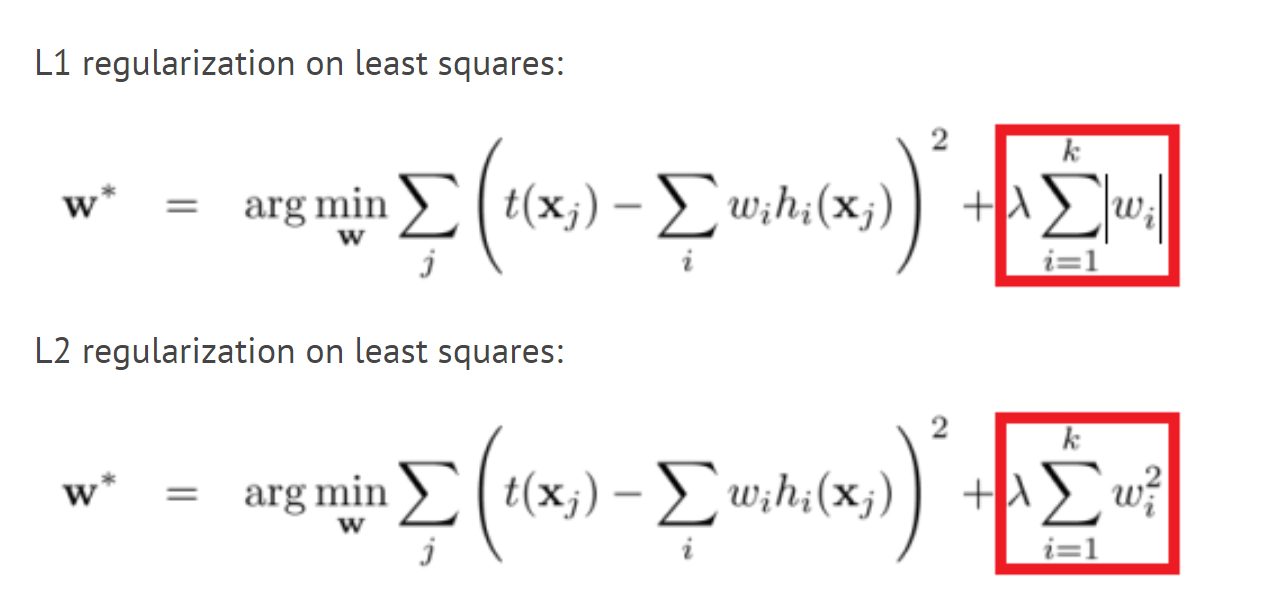

ElasticNet представляет собой линейную комбинацию Lasso и Ridge

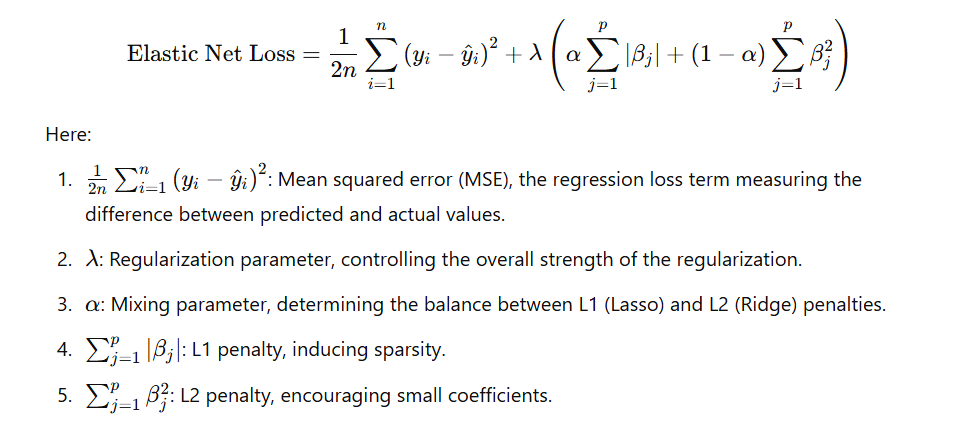

Зададим разные градиенты под разные функции ошибки с соответсвтуещей регуляризацией:

In [228]:
def create_grad_L2(X, Y, w, lambda_ = 1.0):
    """
    Функция вычисления градиента функции ошибки в конкретном состоянии X (без усреднения)
    w = w0, w1, ..., wm или без w0
    len(X.columns) = len(w)
    return: grad (np.array)

    Функция ошибки с L2-регуляризацией (лассо)
    """
    # так как градиент функции ошибки - это  m-мерная точка для объектов i = 1,...,n
    # m - колоичество признаков
    # n - количество записей
    # то создадим вектор 1 на m

    n = len(X)
    m = len(w)
    grad = np.zeros(m)


    for i in range(n):
        
        pred = 0
        # градиент вычисляется по всем наблюдениям
        for j in range(m):
            pred += w[j]*X.iloc[i, j]

        error = Y.iloc[i] - pred

        for j in range(m):
            grad[j] += -2 * (error) * (X.iloc[i, j])

    grad /= n       # усреднение градиента по количеству наблюдений от выбросов

    for j in range(m):   
        grad[j] += lambda_*2*w[j]
        

    return grad



In [229]:
def create_grad_L1(X, Y, w, lambda_ = 1.0):
    """
    Функция вычисления градиента функции ошибки в конкретном состоянии X (без усреднения)
    w = w0, w1, ..., wm или без w0
    len(X.columns) = len(w)
    return: grad (np.array)

    Функция ошибки с L1-регуляризацией (ридж)
    """
    # так как градиент функции ошибки - это  m-мерная точка для объектов i = 1,...,n
    # m - колоичество признаков
    # n - количество записей
    # то создадим вектор 1 на m

    n = len(X)
    m = len(w)
    grad = np.zeros(m)


    for i in range(n):
        
        pred = 0
        # градиент вычисляется по всем наблюдениям
        for j in range(m):
            pred += w[j]*X.iloc[i, j]

        error = Y.iloc[i] - pred

        for j in range(m):
            grad[j] += -2 * (error) * (X.iloc[i, j])

    grad /= n       # усреднение градиента по количеству наблюдений от выбросов

    for j in range(m):          # (|Wj|)' = Wj / |Wj| то есть знак Wj
        if w[j] > 0:
            grad[j] += lambda_
        elif w[j] < 0:
            grad[j] += -lambda_

    return grad



In [230]:
def create_grad_Elastic(X, Y, w, lambda_ = 1.0, alpha=0.5):
    """
    Функция вычисления градиента функции ошибки в конкретном состоянии X 
    w = w0, w1, ..., wm или без w0
    len(X.columns) = len(w)    
    lambda_ : коэффициент регуляризации
    alpha : коэффициент смешивания L1 и L2 регуляризаций
     0 <= alpha <= 1
    return: grad (np.array)


    Функция ошибки с Elastic-регуляризацией
    """
    # так как градиент функции ошибки - это  m-мерная точка для объектов i = 1,...,n
    # m - колоичество признаков
    # n - количество записей
    # то создадим вектор 1 на m

    n = len(X)
    m = len(w)
    grad = np.zeros(m)


    for i in range(n):
        
        pred = 0
        # градиент вычисляется по всем наблюдениям
        for j in range(m):
            pred += w[j]*X.iloc[i, j]

        error = Y.iloc[i] - pred

        for j in range(m):
            grad[j] += -2 * (error) * (X.iloc[i, j]) + lambda_*2*w[j]

    grad /= n       # усреднение градиента по количеству наблюдений от выбросов

    # L1
    for j in range(m):          # (|Wj|)' = Wj / |Wj| то есть знак Wj
        if w[j] > 0:
            grad[j] += lambda_*alpha
        elif w[j] < 0:
            grad[j] += -lambda_*alpha

        # L2
        grad[j] += lambda_*2*w[j]*(1 - alpha)

    return grad



In [231]:
class Linear_Regression_Gradient_Reg:
    """Линейная регрессия с градиентным спуском и регуляризацией
    1) L1 - лассо
    2) L2 - ридж
    3) ElasticNet - смесь L1 и L2
    """
    def __init__(self, fit_intercept: bool = True, penalty: str = None, lambda_= 0.01, alpha= 0.5):
        self.ws = None
        self.w0 = None
        self.intercept = fit_intercept      # включать ли w0
        self.penalty = penalty             # тип регуляризации
        self.lambda_ = lambda_                 # коэффициент регуляризации
        self.alpha = alpha                   # коэффициент смешивания для ElasticNet

    def fit(self, X_train, Y_train, eps = 0.000001, B = 0.001):
        """eps, B: параметры градиентного спуска
        """
        X = X_train.copy()
        Y = Y_train.copy()
        
        # высчитаем веса уравнения
        if self.intercept:  # включить x0 для w0
            X.insert(0, "x0", np.ones((X.shape[0], 1)))

        w0 = np.zeros(len(X.columns))       # для нормализованных признаков можно взять нудевые
        if self.penalty is None:
            opt_w, y_train = Gradient(X, Y, w0, gradient=create_grad, stop_rule=current_stop_rule)
        elif self.penalty == "L2":
            opt_w, y_train = Gradient(X, Y, w0, gradient=create_grad_L2, stop_rule=current_stop_rule, 
                                      lambda_=self.lambda_)
        elif self.penalty == "L1":
            opt_w, y_train = Gradient(X, Y, w0, gradient=create_grad_L1, stop_rule=current_stop_rule, 
                                      lambda_=self.lambda_)
        elif self.penalty == "ElasticNet":
            opt_w, y_train = Gradient(X, Y, w0, gradient=create_grad_Elastic, stop_rule=current_stop_rule, 
                                      lambda_=self.lambda_, alpha=self.alpha)

        if self.intercept:
            self.w0 = opt_w[0]
            self.ws = opt_w[1:]
        else:
            self.w0 = 0
            self.ws = opt_w

        return y_train

        
    def predict(self, X_test):
        if (self.w0 is None) or (self.ws is None):
            raise TypeError("нужно сначала обучить модель - коэффициенты Wi не известны")
        preds = []  # Y_test

        for i in range(len(X_test)):
            if self.intercept:
                equation = self.w0
            else:
                equation = 0

            for j in range(len(X_test.columns)):
                equation += self.ws[j] * X_test.iloc[i, j]
            
            preds.append(equation)

        return pd.Series(preds)

In [232]:
lr_gradient_reg = Linear_Regression_Gradient_Reg(fit_intercept=True, penalty="ElasticNet", lambda_=0.01, alpha=0.5)
lr_gradient_reg.fit(X_train, Y_train, eps=0.001, B=0.00001)
pred_lr_gr_reg = lr_gradient_reg.predict(X_test)

In [233]:
L1 = Lasso()
L2 = Ridge()
EN = ElasticNet()

# моя регуляризация
my_en = Linear_Regression_Gradient_Reg(fit_intercept=True, penalty="ElasticNet", lambda_=0.01, alpha=0.5)
my_L1 = Linear_Regression_Gradient_Reg(fit_intercept=True, penalty="L1", lambda_=0.01, alpha=0.5)
my_L2 = Linear_Regression_Gradient_Reg(fit_intercept=True, penalty="L2", lambda_=0.01, alpha=0.5)

In [234]:
models = [L1, L2, EN, my_L1, my_L2, my_en]

for model in models:
    model.fit(X_train, Y_train)

In [235]:
models_pred_train = [model.predict(X_train) for model in models]
models_pred_test = [model.predict(X_test) for model in models]

In [241]:
df_reg_MAE = pd.DataFrame(np.nan, index=range(6), columns=["model", "train", "test"])
df_reg_RMSE = pd.DataFrame(np.nan, index=range(6), columns=["model", "train", "test"])
df_reg_R2 = pd.DataFrame(np.nan, index=range(6), columns=["model", "train", "test"])

In [249]:
# MAE df
for i in range(len(models)): 
    if i < 3:
        name = f"original {model.penalty}" if hasattr(model, "penalty") else f"original {model.__class__.__name__}"
    else:
        name = f"my {model.penalty}" if hasattr(model, "penalty") else f" my {model.__class__.__name__}"

    model = models[i]  
    df_reg_MAE.iloc[i, 0] = name
    df_reg_MAE.iloc[i, 1] = calculate_MAE(y_true=Y_train, y_pred = models_pred_train[i])
    df_reg_MAE.iloc[i, 2] = calculate_MAE(y_true = Y_test, y_pred = models_pred_test[i])

# RMSE df
    df_reg_RMSE.iloc[i, 0] = name
    df_reg_RMSE.iloc[i, 1] = calculate_RMSE(y_true=Y_train, y_pred = models_pred_train[i])
    df_reg_RMSE.iloc[i, 2] = calculate_RMSE(y_true = Y_test, y_pred = models_pred_test[i])

# R2 df
    df_reg_R2.iloc[i, 0] = name
    df_reg_R2.iloc[i, 1] = calculate_r2(y_true=Y_train, y_pred = models_pred_train[i])
    df_reg_R2.iloc[i, 2] = calculate_r2(y_true = Y_test, y_pred = models_pred_test[i])

In [250]:
display(df_reg_MAE)

,model,train,test
0,original ElasticNet,686.358200,688.424216
1,original Lasso,686.934368,688.844823
2,original Ridge,777.078445,785.683877
3,my ElasticNet,737.024270,747.652368
4,my L1,860.739511,868.733763
5,my L2,1048.440534,1050.357564


In [251]:
display(df_reg_RMSE)

,model,train,test
0,original ElasticNet,997.289098,995.054041
1,original Lasso,997.119849,994.721941
2,original Ridge,1149.880796,1162.945341
3,my ElasticNet,1070.176119,1076.565138
4,my L1,1262.670137,1269.512633
5,my L2,1482.859225,1488.374048


In [253]:
display(df_reg_R2)

,model,train,test
0,original ElasticNet,0.601824,0.616130
1,original Lasso,0.601959,0.616386
2,original Ridge,0.470656,0.475665
3,my ElasticNet,0.541496,0.550664
4,my L1,0.361718,0.375166
5,my L2,0.119696,0.141155


# Part 6

Feature normalization

### 1) First, write several examples of why and where feature normalization is mandatory and vice versa

* когда нормализация необходима

Нормализация признаков нужна, когда признаки лежат сильно в разных диапозонах, чтобы градиентный, координатный спуск быстро сошелся (оптимальные веса находятся в пропорции признаков) и другие методы МО работали корректно (KMeans и подобные модели кластеризации). Например, x1 - количество комнат [1;5], x2 - цена [1 000 000; 100 000 000].

* когда необязательно

Есть модели МО, не зависящие от масштаба признаков (Decision Tree, Random Forest, Gradient Boosting), так как там идет деление данные по пороговым значениям, а не по расстоянию между ними.

## 2) Let's consider the first of the classical normalization methods — MinMaxScaler. Write a mathematical formula for this method

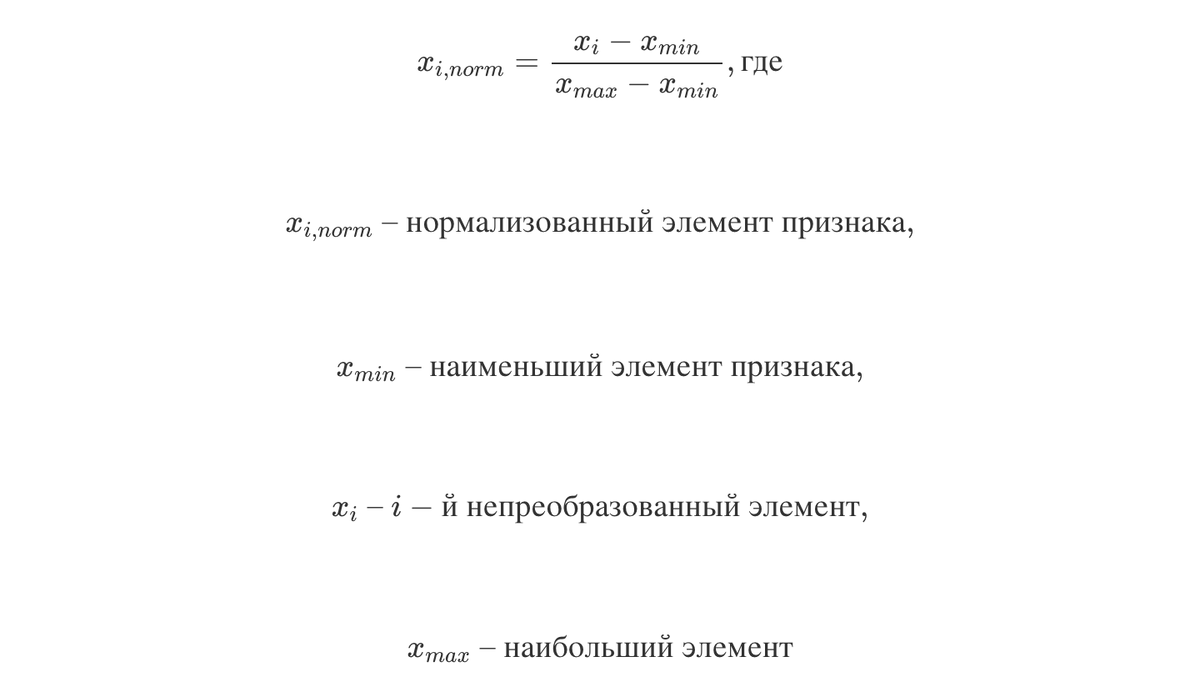

*[MinMaxScaler в Машинном обучении простыми словами](https://dzen.ru/a/YmRK3JlA8gAA-h7h)

## 3) Implement your own function or class for MinMaxScaler feature normalization

In [254]:
def MinMaxScaler_func(X):
    """
    X: pd.DataFrame
    """
    X_scaled = X.copy()
    for c in X.columns:
        min_c = X[c].min()
        max_c = X[c].max()
        X_scaled[c] = (X[c] - min_c) / (max_c - min_c)
    return X_scaled 


In [255]:
scaler = MinMaxScaler()

## 4) Compare the feature normalization with your own method and with sklearn.

In [256]:
sk_scaled_minmax = scaler.fit_transform(X_train)

In [257]:
my_scaled_minmax = MinMaxScaler_func(X_train)

In [258]:
# наскоьлко похожи результаты
(my_scaled_minmax == sk_scaled_minmax).stack().mean()

np.float64(0.998881396556725)

## 5) Repeat the steps from b to e for another normalization method StandardScaler

StandardScaler (стандартный масштабатор) используется для изменения размера распределения значений так, чтобы среднее значение наблюдаемых значений было равно 0, а стандартное отклонение – 1

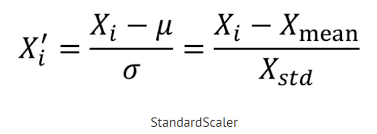

In [259]:
def standard_scaler_func(X):
    """
    X: pd.DataFrame
    """
    X_scaled = X.copy()
    for c in X.columns:
        mean_c = X[c].mean()
        std_c = X[c].std()
        X_scaled[c] = (X[c] - mean_c) / std_c
    return X_scaled

In [260]:
scaler = StandardScaler()
sk_scaled_standard = scaler.fit_transform(X_train)
my_scaled_standard = standard_scaler_func(X_train)

In [261]:
my_scaled_standard

,bathrooms,bedrooms,interest_level,Elevator,HardwoodFloors,CatsAllowed,DogsAllowed,Doorman,Dishwasher,NoFee,...,LaundryinUnit,RoofDeck,OutdoorSpace,DiningRoom,HighSpeedInternet,Balcony,SwimmingPool,LaundryInBuilding,NewConstruction,Terrace
0,-0.427092,-0.486636,-0.610219,0.950874,1.041279,1.046200,1.112326,-0.860105,1.184849,-0.760983,...,-0.459159,-0.391457,-0.398587,-0.335413,-0.309358,-0.25308,-0.240160,-0.233769,-0.234752,-0.219648
1,-0.427092,-0.486636,-0.610219,-1.051637,-0.960333,1.046200,1.112326,1.162619,-0.843968,-0.760983,...,-0.459159,-0.391457,-0.398587,-0.335413,-0.309358,-0.25308,-0.240160,-0.233769,-0.234752,-0.219648
2,-0.427092,0.424355,-0.610219,0.950874,-0.960333,1.046200,1.112326,1.162619,-0.843968,-0.760983,...,-0.459159,-0.391457,2.508798,-0.335413,-0.309358,-0.25308,-0.240160,-0.233769,-0.234752,4.552629
3,1.774635,0.424355,-0.610219,0.950874,1.041279,-0.955816,-0.898994,1.162619,1.184849,1.314055,...,-0.459159,2.554490,-0.398587,2.981323,-0.309358,-0.25308,4.163791,-0.233769,-0.234752,4.552629
4,-0.427092,0.424355,1.008631,0.950874,-0.960333,-0.955816,-0.898994,-0.860105,-0.843968,-0.760983,...,-0.459159,-0.391457,-0.398587,-0.335413,-0.309358,-0.25308,-0.240160,-0.233769,-0.234752,-0.219648
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38669,-0.427092,1.335346,-0.610219,0.950874,1.041279,-0.955816,-0.898994,1.162619,-0.843968,1.314055,...,2.177837,-0.391457,-0.398587,-0.335413,-0.309358,-0.25308,-0.240160,-0.233769,-0.234752,-0.219648
38670,2.875499,2.246337,-0.610219,0.950874,1.041279,-0.955816,-0.898994,-0.860105,1.184849,-0.760983,...,2.177837,-0.391457,-0.398587,-0.335413,-0.309358,-0.25308,-0.240160,-0.233769,-0.234752,-0.219648
38671,-0.427092,0.424355,-0.610219,0.950874,1.041279,-0.955816,-0.898994,1.162619,-0.843968,-0.760983,...,-0.459159,-0.391457,-0.398587,-0.335413,-0.309358,-0.25308,-0.240160,-0.233769,-0.234752,-0.219648
38672,-0.427092,-0.486636,-0.610219,-1.051637,-0.960333,1.046200,1.112326,-0.860105,-0.843968,-0.760983,...,-0.459159,-0.391457,-0.398587,-0.335413,-0.309358,-0.25308,-0.240160,-0.233769,-0.234752,-0.219648


In [262]:
sk_scaled_standard

array([[-0.42709754, -0.48664247, -0.61022649, ..., -0.23377249,
        -0.23475508, -0.21965047],
       [-0.42709754, -0.48664247, -0.61022649, ..., -0.23377249,
        -0.23475508, -0.21965047],
       [-0.42709754,  0.42436052, -0.61022649, ..., -0.23377249,
        -0.23475508,  4.55268781],
       ...,
       [-0.42709754,  0.42436052, -0.61022649, ..., -0.23377249,
        -0.23475508, -0.21965047],
       [-0.42709754, -0.48664247, -0.61022649, ..., -0.23377249,
        -0.23475508, -0.21965047],
       [-0.42709754, -1.39764546, -0.61022649, ..., -0.23377249,
        -0.23475508, -0.21965047]], shape=(38674, 23))

In [263]:
(my_scaled_standard.round(4) == sk_scaled_standard.round(4)).stack().mean()

np.float64(0.7716553757046077)

# 7) Fit custom and sklearn models with normalized data

## 1) Fit all models — Linear Regression, Ridge, Lasso, and ElasticNet — with MinMaxScaler

In [264]:
my_scaled_x_test = MinMaxScaler_func(X_test)

In [265]:
my_lr = Linear_Regression_Gradient_Reg(fit_intercept=True, penalty=None)
lr_en = Linear_Regression_Gradient_Reg(fit_intercept=True, penalty="ElasticNet", lambda_=0.01, alpha=0.5)
lr_L1 = Linear_Regression_Gradient_Reg(fit_intercept=True, penalty="L1", lambda_=0.01, alpha=0.5)
lr_L2 = Linear_Regression_Gradient_Reg(fit_intercept=True, penalty="L2", lambda_=0.01, alpha=0.5)

In [266]:
my_lr.fit(my_scaled_minmax, Y_train)
lr_en.fit(my_scaled_minmax, Y_train, eps=0.001, B=0.00001)
lr_L1.fit(my_scaled_minmax, Y_train, eps=0.001, B=0.00001)
lr_L2.fit(my_scaled_minmax, Y_train, eps=0.001, B=0.00001)

0        3280.279299
1        2188.963981
2        2812.623476
3        3554.012105
4        1757.873751
            ...     
38669    3181.988767
38670    2932.738701
38671    2273.795367
38672    1977.894872
38673    1784.186868
Length: 38674, dtype: float64

In [267]:
pred_lr_en = lr_en.predict(my_scaled_x_test)
pred_lr = my_lr.predict(my_scaled_x_test)
pred_lr_L1 = lr_L1.predict(my_scaled_x_test)
pred_lr_L2 = lr_L2.predict(my_scaled_x_test)


In [268]:
models = [my_lr, lr_L1, lr_L2, lr_en]
preds_test = [pred_lr, pred_lr_L1, pred_lr_L2, pred_lr_en]
preds_train = [model.predict(my_scaled_minmax) for model in models]

In [269]:
# свои модели с нормированными по minmax
df_reg_MAE_minmax = pd.DataFrame(np.nan, index=range(4), columns=["model", "train", "test"])
df_reg_RMSE_minmax = pd.DataFrame(np.nan, index=range(4), columns=["model", "train", "test"])
df_reg_R2_minmax = pd.DataFrame(np.nan, index=range(4), columns=["model", "train", "test"])

In [270]:
# MAE df
for i in range(len(models)):  
    model = models[i]  
    df_reg_MAE_minmax.iloc[i, 0] = f"MinMax {model.penalty}"  if (model.penalty is not None) else f"MinMax {model.__class__.__name__}"
    df_reg_MAE_minmax.iloc[i, 1] = calculate_MAE(y_true=Y_train, y_pred = preds_train[i])
    df_reg_MAE_minmax.iloc[i, 2] = calculate_MAE(y_true = Y_test, y_pred = preds_test[i])

# RMSE df
for i in range(len(models)):    
    model = models[i]
    df_reg_RMSE_minmax.iloc[i, 0] = f"MinMax {model.penalty}" if (model.penalty is not None) else f"MinMax {model.__class__.__name__}"
    df_reg_RMSE_minmax.iloc[i, 1] = calculate_RMSE(y_true=Y_train, y_pred = preds_train[i])
    df_reg_RMSE_minmax.iloc[i, 2] = calculate_RMSE(y_true = Y_test, y_pred = preds_test[i])

# R2 df
for i in range(len(models)):    
    model = models[i]
    df_reg_R2_minmax.iloc[i, 0] = f"MinMax {model.penalty}" if (model.penalty is not None) else f"MinMax {model.__class__.__name__}"
    df_reg_R2_minmax.iloc[i, 1] = calculate_r2(y_true=Y_train, y_pred = preds_train[i])
    df_reg_R2_minmax.iloc[i, 2] = calculate_r2(y_true = Y_test, y_pred = preds_test[i])

Модели линейной регерссии с нормированными X по minmax

In [271]:
display(df_reg_MAE_minmax)

,model,train,test
0,MinMax Linear_Regression_Gradient_Reg,1077.644971,1080.796524
1,MinMax L1,1077.451134,1080.584006
2,MinMax L2,1310.621532,1289.968679
3,MinMax ElasticNet,1464.196558,1442.073687


In [272]:
display(df_reg_RMSE_minmax)

,model,train,test
0,MinMax Linear_Regression_Gradient_Reg,1544.330429,1539.970250
1,MinMax L1,1544.287565,1539.956778
2,MinMax L2,1867.406519,1855.611362
3,MinMax ElasticNet,2025.893386,2015.426505


In [273]:
display(df_reg_R2_minmax)

,model,train,test
0,MinMax Linear_Regression_Gradient_Reg,0.045199,0.080577
1,MinMax L1,0.045252,0.080593
2,MinMax L2,-0.396080,-0.334949
3,MinMax ElasticNet,-0.643107,-0.574797


## 2) Fit all models — Linear Regression, Ridge, Lasso, and ElasticNet — with StandardScaler

Теперь разные модели с нормированными X по standardScaler

In [274]:
standard_scaler_x_test = standard_scaler_func(X_test)

In [275]:
my_lr = Linear_Regression_Gradient_Reg(fit_intercept=True, penalty=None)
lr_en = Linear_Regression_Gradient_Reg(fit_intercept=True, penalty="ElasticNet", lambda_=0.01, alpha=0.5)
lr_L1 = Linear_Regression_Gradient_Reg(fit_intercept=True, penalty="L1", lambda_=0.01, alpha=0.5)
lr_L2 = Linear_Regression_Gradient_Reg(fit_intercept=True, penalty="L2", lambda_=0.01, alpha=0.5)

my_lr.fit(my_scaled_standard, Y_train)
lr_en.fit(my_scaled_standard, Y_train, eps=0.001, B=0.00001)
lr_L1.fit(my_scaled_standard, Y_train, eps=0.001, B=0.00001)
lr_L2.fit(my_scaled_standard, Y_train, eps=0.001, B=0.00001)

pred_lr_en = lr_en.predict(standard_scaler_x_test)
pred_lr = my_lr.predict(standard_scaler_x_test)
pred_lr_L1 = lr_L1.predict(standard_scaler_x_test)
pred_lr_L2 = lr_L2.predict(standard_scaler_x_test)


In [276]:
models = [my_lr, lr_L1, lr_L2, lr_en]
preds_test = [pred_lr, pred_lr_L1, pred_lr_L2, pred_lr_en]
preds_train = [model.predict(my_scaled_standard) for model in models]

In [277]:
# свои модели с нормированными по standard
df_reg_MAE_standard = pd.DataFrame(np.nan, index=range(4), columns=["model", "train", "test"])
df_reg_RMSE_standard = pd.DataFrame(np.nan, index=range(4), columns=["model", "train", "test"])
df_reg_R2_standard = pd.DataFrame(np.nan, index=range(4), columns=["model", "train", "test"])

In [278]:
# MAE df
for i in range(len(models)):  
    model = models[i]  
    df_reg_MAE_standard.iloc[i, 0] = f"StandardScaler {model.penalty}"  if (model.penalty is not None) else f"StandardScaler {model.__class__.__name__}"
    df_reg_MAE_standard.iloc[i, 1] = calculate_MAE(y_true=Y_train, y_pred = preds_train[i])
    df_reg_MAE_standard.iloc[i, 2] = calculate_MAE(y_true = Y_test, y_pred = preds_test[i])

# RMSE df
for i in range(len(models)):    
    model = models[i]
    df_reg_RMSE_standard.iloc[i, 0] = f"StandardScaler {model.penalty}" if (model.penalty is not None) else f"StandardScaler {model.__class__.__name__}"
    df_reg_RMSE_standard.iloc[i, 1] = calculate_RMSE(y_true=Y_train, y_pred = preds_train[i])
    df_reg_RMSE_standard.iloc[i, 2] = calculate_RMSE(y_true = Y_test, y_pred = preds_test[i])

# R2 df
for i in range(len(models)):    
    model = models[i]
    df_reg_R2_standard.iloc[i, 0] = f"StandardScaler {model.penalty}" if (model.penalty is not None) else f"StandardScaler {model.__class__.__name__}"
    df_reg_R2_standard.iloc[i, 1] = calculate_r2(y_true=Y_train, y_pred = preds_train[i])
    df_reg_R2_standard.iloc[i, 2] = calculate_r2(y_true = Y_test, y_pred = preds_test[i])

In [279]:
display(df_reg_MAE_standard)

,model,train,test
0,StandardScaler Linear_Regression_Gradient_Reg,686.909555,686.045658
1,StandardScaler L1,686.813279,685.962393
2,StandardScaler L2,1775.227489,1770.797663
3,StandardScaler ElasticNet,2122.740965,2118.914805


In [280]:
display(df_reg_RMSE_standard)

,model,train,test
0,StandardScaler Linear_Regression_Gradient_Reg,1027.777820,1026.117404
1,StandardScaler L1,1027.928583,1026.296942
2,StandardScaler L2,2087.731336,2090.819270
3,StandardScaler ElasticNet,2417.039812,2420.806127


In [281]:
display(df_reg_R2_standard)

,model,train,test
0,StandardScaler Linear_Regression_Gradient_Reg,0.577106,0.591789
1,StandardScaler L1,0.576982,0.591646
2,StandardScaler L2,-0.744945,-0.694820
3,StandardScaler ElasticNet,-1.338838,-1.272012


## 3) Add all results to our dataframe with metrics on samples

Сравним с результатами Sklearn

In [282]:
L1 = Lasso()
L2 = Ridge()
EN = ElasticNet()
REG = LinearRegression(fit_intercept=True)

models = [L1, L2, EN, REG]

# minmax
for model in models:
    model.fit(my_scaled_minmax, Y_train)

models_pred_train = [model.predict(my_scaled_minmax) for model in models]
models_pred_test = [model.predict(my_scaled_x_test) for model in models]



In [284]:
df_reg_MAE_sk_minmax = pd.DataFrame(np.nan, index=range(4), columns=["model", "train", "test"])
df_reg_RMSE_sk_minmax = pd.DataFrame(np.nan, index=range(4), columns=["model", "train", "test"])
df_reg_R2_sk_minmax = pd.DataFrame(np.nan, index=range(4), columns=["model", "train", "test"])

# MAE df
for i in range(len(models)):  
    model = models[i]  
    df_reg_MAE_sk_minmax.iloc[i, 0] = f"original MinMax {model.penalty}" if hasattr(model, "penalty") else f"original MinMax {model.__class__.__name__}"
    df_reg_MAE_sk_minmax.iloc[i, 1] = calculate_MAE(y_true=Y_train, y_pred = models_pred_train[i])
    df_reg_MAE_sk_minmax.iloc[i, 2] = calculate_MAE(y_true = Y_test, y_pred = models_pred_test[i])

# RMSE df
for i in range(len(models)):    
    model = models[i]
    df_reg_RMSE_sk_minmax.iloc[i, 0] = f"original MinMax {model.penalty}" if hasattr(model, "penalty") else f"original MinMax {model.__class__.__name__}"
    df_reg_RMSE_sk_minmax.iloc[i, 1] = calculate_RMSE(y_true=Y_train, y_pred = models_pred_train[i])
    df_reg_RMSE_sk_minmax.iloc[i, 2] = calculate_RMSE(y_true = Y_test, y_pred = models_pred_test[i])

# R2 df
for i in range(len(models)):    
    model = models[i]
    df_reg_R2_sk_minmax.iloc[i, 0] = f"original MinMax {model.penalty}" if hasattr(model, "penalty") else f"original MinMax {model.__class__.__name__}"
    df_reg_R2_sk_minmax.iloc[i, 1] = calculate_r2(y_true=Y_train, y_pred = models_pred_train[i])
    df_reg_R2_sk_minmax.iloc[i, 2] = calculate_r2(y_true = Y_test, y_pred = models_pred_test[i])

In [285]:
display(df_reg_MAE_sk_minmax)

,model,train,test
0,original MinMax Lasso,686.549613,2633.355119
1,original MinMax Ridge,687.070476,2683.941407
2,original MinMax ElasticNet,1042.932366,1057.921712
3,original MinMax LinearRegression,686.938386,2729.904465


In [286]:
display(df_reg_RMSE_sk_minmax)

,model,train,test
0,original MinMax Lasso,997.526724,2928.080867
1,original MinMax Ridge,997.167260,2984.710043
2,original MinMax ElasticNet,1466.872145,1485.539381
3,original MinMax LinearRegression,997.119843,3034.841200


In [288]:
display(df_reg_R2_sk_minmax)

,model,train,test
0,original MinMax Lasso,0.601635,-2.323967
1,original MinMax Ridge,0.601922,-2.453781
2,original MinMax ElasticNet,0.138576,0.144423
3,original MinMax LinearRegression,0.601959,-2.570775


In [289]:
L1 = Lasso()
L2 = Ridge()
EN = ElasticNet()
REG = LinearRegression(fit_intercept=True)

models = [L1, L2, EN, REG]

# minmax
for model in models:
    model.fit(my_scaled_standard, Y_train)

models_pred_train = [model.predict(my_scaled_standard) for model in models]
models_pred_test = [model.predict(standard_scaler_x_test) for model in models]



In [301]:
# для standardScaler нормализации
df_reg_MAE_sk_standard = pd.DataFrame(np.nan, index=range(4), columns=["model", "train", "test"])
df_reg_RMSE_sk_standard = pd.DataFrame(np.nan, index=range(4), columns=["model", "train", "test"])
df_reg_R2_sk_standard = pd.DataFrame(np.nan, index=range(4), columns=["model", "train", "test"])

# MAE df
for i in range(len(models)):  
    model = models[i]  
    df_reg_MAE_sk_standard.iloc[i, 0] = f"original StandardScaler {model.penalty}" if hasattr(model, "penalty") else f"original StandardScaler {model.__class__.__name__}"
    df_reg_MAE_sk_standard.iloc[i, 1] = calculate_MAE(y_true=Y_train, y_pred = models_pred_train[i])
    df_reg_MAE_sk_standard.iloc[i, 2] = calculate_MAE(y_true = Y_test, y_pred = models_pred_test[i])

# RMSE df
for i in range(len(models)):    
    model = models[i]
    df_reg_RMSE_sk_standard.iloc[i, 0] = f"original StandardScaler {model.penalty}" if hasattr(model, "penalty") else f"original StandardScaler {model.__class__.__name__}"
    df_reg_RMSE_sk_standard.iloc[i, 1] = calculate_RMSE(y_true=Y_train, y_pred = models_pred_train[i])
    df_reg_RMSE_sk_standard.iloc[i, 2] = calculate_RMSE(y_true = Y_test, y_pred = models_pred_test[i])

# R2 df
for i in range(len(models)):    
    model = models[i]
    df_reg_R2_sk_standard.iloc[i, 0] = f"original StandardScaler {model.penalty}" if hasattr(model, "penalty") else f"original StandardScaler {model.__class__.__name__}"
    df_reg_R2_sk_standard.iloc[i, 1] = calculate_r2(y_true=Y_train, y_pred = models_pred_train[i])
    df_reg_R2_sk_standard.iloc[i, 2] = calculate_r2(y_true = Y_test, y_pred = models_pred_test[i])

In [302]:
display(df_reg_MAE_sk_standard)

,model,train,test
0,original StandardScaler Lasso,686.646175,688.092417
1,original StandardScaler Ridge,686.937200,688.272500
2,original StandardScaler ElasticNet,712.419385,719.045061
3,original StandardScaler LinearRegression,686.938386,688.273128


In [303]:
display(df_reg_RMSE_sk_standard)

,model,train,test
0,original StandardScaler Lasso,997.150181,995.185726
1,original StandardScaler Ridge,997.119843,995.041373
2,original StandardScaler ElasticNet,1042.259700,1048.818247
3,original StandardScaler LinearRegression,997.119843,995.040676


In [304]:
display(df_reg_R2_sk_standard)

,model,train,test
0,original StandardScaler Lasso,0.601935,0.616029
1,original StandardScaler Ridge,0.601959,0.616140
2,original StandardScaler ElasticNet,0.565105,0.573528
3,original StandardScaler LinearRegression,0.601959,0.616141


# Part 8

Overfit models

В реальных случаях F(x) может иметь выше порядок, чем семейство линейных функций f(x) регрессии. В таком случае легко переобучить или недообучить модель. 

## In the previous lesson, we created polynomial features with degree 10. Here we repeat these steps from the previous lesson, remembering that we have only 2 basic features — 'bathrooms' and 'bedrooms'

Зададим признаки bathrooms и bedrooms в виде полиномов 10 степени

In [305]:
X_train

,bathrooms,bedrooms,interest_level,Elevator,HardwoodFloors,CatsAllowed,DogsAllowed,Doorman,Dishwasher,NoFee,...,LaundryinUnit,RoofDeck,OutdoorSpace,DiningRoom,HighSpeedInternet,Balcony,SwimmingPool,LaundryInBuilding,NewConstruction,Terrace
0,1.0,1,0,1,1,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1.0,1,0,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.0,2,0,1,0,1,1,1,0,0,...,0,0,1,0,0,0,0,0,0,1
3,2.0,2,0,1,1,0,0,1,1,1,...,0,1,0,1,0,0,1,0,0,1
4,1.0,2,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38669,1.0,3,0,1,1,0,0,1,0,1,...,1,0,0,0,0,0,0,0,0,0
38670,2.5,4,0,1,1,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
38671,1.0,2,0,1,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
38672,1.0,1,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [306]:
poly = PolynomialFeatures(degree=10)

X_train_poly = X_train.copy()
X_test_poly = X_test.copy()

# X_train
bathrooms_poly_x_train = poly.fit_transform(X_train_poly["bathrooms"].values.reshape(-1, 1))   # fit_transform не принимает Series, 1D -> 2D
bedrooms_poly_x_train = poly.fit_transform(X_train_poly["bedrooms"].values.reshape(-1, 1))

# X_test
bathrooms_poly_x_test = poly.fit_transform(X_test_poly["bathrooms"].values.reshape(-1, 1))
bedrooms_poly_x_test = poly.fit_transform(X_test_poly["bedrooms"].values.reshape(-1, 1))

In [307]:
X_train_poly.drop("bathrooms", axis=1, inplace=True)
X_train_poly = pd.concat([X_train_poly, pd.DataFrame(bathrooms_poly_x_train)], axis=1)

In [308]:
X_train_poly.drop("bedrooms", axis=1, inplace=True)
X_train_poly = pd.concat([X_train_poly, pd.DataFrame(bedrooms_poly_x_train)], axis=1)

In [309]:
X_test_poly.drop(["bathrooms", "bedrooms"], axis=1, inplace=True)
X_test_poly = pd.concat([X_test_poly, pd.DataFrame(bathrooms_poly_x_test)], axis=1)
X_test_poly = pd.concat([X_test_poly, pd.DataFrame(bedrooms_poly_x_test)], axis=1)

## And train and fit all our implemented algorithms — Linear Regression, Ridge, Lasso, and ElasticNet — on a set of polynomial features

In [352]:
my_lr = Linear_Regression_Gradient_Reg(fit_intercept=True, penalty=None)
lr_en = Linear_Regression_Gradient_Reg(fit_intercept=True, penalty="ElasticNet", lambda_=0.01, alpha=0.5)
lr_L1 = Linear_Regression_Gradient_Reg(fit_intercept=True, penalty="L1", lambda_=0.01, alpha=0.5)
lr_L2 = Linear_Regression_Gradient_Reg(fit_intercept=True, penalty="L2", lambda_=0.01, alpha=0.5)

my_lr.fit(X_train_poly, Y_train)
lr_en.fit(X_train_poly, Y_train, eps=0.001, B=0.00001)
lr_L1.fit(X_train_poly, Y_train, eps=0.001, B=0.00001)
lr_L2.fit(X_train_poly, Y_train, eps=0.001, B=0.00001)


0       -1.682283e+170
1       -1.682283e+170
2       -1.722476e+170
3       -1.631990e+173
4       -1.722476e+170
             ...      
38669   -3.940082e+170
38670   -1.507996e+174
38671   -1.722476e+170
38672   -1.682283e+170
38673   -1.682241e+170
Length: 38674, dtype: float64

In [353]:
models = [my_lr, lr_en, lr_L1, lr_L2]
models_pred_train = [model.predict(X_train_poly) for model in models]
models_pred_test = [model.predict(X_test_poly) for model in models]

## Store the results of the quality metrics in the result dataframe

In [354]:
df_reg_MAE_poly = pd.DataFrame(np.nan, index=range(4), columns=["model", "train", "test"])
df_reg_RMSE_poly = pd.DataFrame(np.nan, index=range(4), columns=["model", "train", "test"])
df_reg_R2_poly = pd.DataFrame(np.nan, index=range(4), columns=["model", "train", "test"])

# MAE df
for i in range(len(models)):  
    model = models[i]  
    df_reg_MAE_poly.iloc[i, 0] = f"poly alpha=0.5 {model.penalty}"  if (model.penalty is not None) else f"poly alpha=0.5 {model.__class__.__name__}"
    df_reg_MAE_poly.iloc[i, 1] = calculate_MAE(y_true=Y_train, y_pred = models_pred_train[i])
    df_reg_MAE_poly.iloc[i, 2] = calculate_MAE(y_true = Y_test, y_pred = models_pred_test[i])

# RMSE df
for i in range(len(models)):    
    model = models[i]
    df_reg_RMSE_poly.iloc[i, 0] = f"poly alpha=0.5 {model.penalty}" if (model.penalty is not None) else f"poly alpha=0.5 {model.__class__.__name__}"
    df_reg_RMSE_poly.iloc[i, 1] = calculate_RMSE(y_true=Y_train, y_pred = models_pred_train[i])
    df_reg_RMSE_poly.iloc[i, 2] = calculate_RMSE(y_true = Y_test, y_pred = models_pred_test[i])

# R2 df
for i in range(len(models)):    
    model = models[i]
    df_reg_R2_poly.iloc[i, 0] = f"poly alpha=0.5 {model.penalty}" if (model.penalty is not None) else f"poly alpha=0.5 {model.__class__.__name__}"
    df_reg_R2_poly.iloc[i, 1] = calculate_r2(y_true=Y_train, y_pred = models_pred_train[i])
    df_reg_R2_poly.iloc[i, 2] = calculate_r2(y_true = Y_test, y_pred = models_pred_test[i])


In [355]:
display(df_reg_MAE_poly)

,model,train,test
0,poly alpha=0.5 Linear_Regression_Gradient_Reg,4.001815e+175,5.604346e+173
1,poly alpha=0.5 ElasticNet,4.001815e+175,5.604346e+173
2,poly alpha=0.5 L1,4.001815e+175,5.604346e+173
3,poly alpha=0.5 L2,4.001815e+175,5.604346e+173


In [356]:
display(df_reg_RMSE_poly)

,model,train,test
0,poly alpha=0.5 Linear_Regression_Gradient_Reg,inf,inf
1,poly alpha=0.5 ElasticNet,inf,inf
2,poly alpha=0.5 L1,inf,inf
3,poly alpha=0.5 L2,inf,inf


In [357]:
display(df_reg_R2_poly)

,model,train,test
0,poly alpha=0.5 Linear_Regression_Gradient_Reg,-inf,-inf
1,poly alpha=0.5 ElasticNet,-inf,-inf
2,poly alpha=0.5 L1,-inf,-inf
3,poly alpha=0.5 L2,-inf,-inf


## Analyze the results and select the best model according to your opinion

Судя по результатам, степень оказалась слишком большой и модели переобучились + из-за увеличения признаков требуется больше вычислительной мощности. 

## Additionally try different alpha parameters of regularization in algorithms, choose the best one and analyze results

Судя по результатам, нет смысла смотреть степень 10. Попробуем сместить влияние Лассо регуляризации (L1)
* уменьшим до alpha=0.25
* увеличим до alpha=0.75

In [358]:
# alpha = 0.25
my_lr = Linear_Regression_Gradient_Reg(fit_intercept=True, penalty=None)
lr_en = Linear_Regression_Gradient_Reg(fit_intercept=True, penalty="ElasticNet", lambda_=0.01, alpha=0.25)
lr_L1 = Linear_Regression_Gradient_Reg(fit_intercept=True, penalty="L1", lambda_=0.01, alpha=0.25)
lr_L2 = Linear_Regression_Gradient_Reg(fit_intercept=True, penalty="L2", lambda_=0.01, alpha=0.25)

my_lr.fit(X_train, Y_train)
lr_en.fit(X_train, Y_train, eps=0.001, B=0.00001)
lr_L1.fit(X_train, Y_train, eps=0.001, B=0.00001)
lr_L2.fit(X_train, Y_train, eps=0.001, B=0.00001)

0        2891.132115
1        2428.361407
2        3398.878586
3        4409.458749
4        2776.068747
            ...     
38669    4215.921343
38670    5711.897341
38671    3121.708529
38672    2248.410896
38673    1520.893018
Length: 38674, dtype: float64

In [359]:
models = [my_lr, lr_en, lr_L1, lr_L2]
models_pred_train = [model.predict(X_train) for model in models]
models_pred_test = [model.predict(X_test) for model in models]

In [360]:
df_reg_MAE_poly_1 = pd.DataFrame(np.nan, index=range(4), columns=["model", "train", "test"])
df_reg_RMSE_poly_1 = pd.DataFrame(np.nan, index=range(4), columns=["model", "train", "test"])
df_reg_R2_poly_1 = pd.DataFrame(np.nan, index=range(4), columns=["model", "train", "test"])

# MAE df
for i in range(len(models)):  
    model = models[i]  
    df_reg_MAE_poly_1.iloc[i, 0] = f"alpha=0.25 {model.penalty}"  if (model.penalty is not None) else f"alpha=0.25 {model.__class__.__name__}"
    df_reg_MAE_poly_1.iloc[i, 1] = calculate_MAE(y_true=Y_train, y_pred = models_pred_train[i])
    df_reg_MAE_poly_1.iloc[i, 2] = calculate_MAE(y_true = Y_test, y_pred = models_pred_test[i])

# RMSE df
for i in range(len(models)):    
    model = models[i]
    df_reg_RMSE_poly_1.iloc[i, 0] = f"alpha=0.25 {model.penalty}" if (model.penalty is not None) else f"alpha=0.25 {model.__class__.__name__}"
    df_reg_RMSE_poly_1.iloc[i, 1] = calculate_RMSE(y_true=Y_train, y_pred = models_pred_train[i])
    df_reg_RMSE_poly_1.iloc[i, 2] = calculate_RMSE(y_true = Y_test, y_pred = models_pred_test[i])

# R2 df
for i in range(len(models)):    
    model = models[i]
    df_reg_R2_poly_1.iloc[i, 0] = f"alpha=0.25 {model.penalty}" if (model.penalty is not None) else f"alpha=0.25 {model.__class__.__name__}"
    df_reg_R2_poly_1.iloc[i, 1] = calculate_r2(y_true=Y_train, y_pred = models_pred_train[i])
    df_reg_R2_poly_1.iloc[i, 2] = calculate_r2(y_true = Y_test, y_pred = models_pred_test[i])


In [ ]:
# alpha=0.75
# !!! выполняется где-то 5 часов !!!
my_lr = Linear_Regression_Gradient_Reg(fit_intercept=True, penalty=None)
lr_en = Linear_Regression_Gradient_Reg(fit_intercept=True, penalty="ElasticNet", lambda_=0.01, alpha=0.75)
lr_L1 = Linear_Regression_Gradient_Reg(fit_intercept=True, penalty="L1", lambda_=0.01, alpha=0.75)
lr_L2 = Linear_Regression_Gradient_Reg(fit_intercept=True, penalty="L2", lambda_=0.01, alpha=0.75)

my_lr.fit(X_train, Y_train)
lr_en.fit(X_train, Y_train, eps=0.001, B=0.00001)
lr_L1.fit(X_train, Y_train, eps=0.001, B=0.00001)
lr_L2.fit(X_train, Y_train, eps=0.001, B=0.00001)

In [ ]:
models = [my_lr, lr_en, lr_L1, lr_L2]
models_pred_train = [model.predict(X_train) for model in models]
models_pred_test = [model.predict(X_test) for model in models]

In [ ]:
df_reg_MAE_poly_2 = pd.DataFrame(np.nan, index=range(4), columns=["model", "train", "test"])
df_reg_RMSE_poly_2 = pd.DataFrame(np.nan, index=range(4), columns=["model", "train", "test"])
df_reg_R2_poly_2 = pd.DataFrame(np.nan, index=range(4), columns=["model", "train", "test"])

# MAE df
for i in range(len(models)):  
    model = models[i]  
    df_reg_MAE_poly_2.iloc[i, 0] = f"alpha=0.75 {model.penalty}"  if (model.penalty is not None) else f"alpha=0.75 {model.__class__.__name__}"
    df_reg_MAE_poly_2.iloc[i, 1] = calculate_MAE(y_true=Y_train, y_pred = models_pred_train[i])
    df_reg_MAE_poly_2.iloc[i, 2] = calculate_MAE(y_true = Y_test, y_pred = models_pred_test[i])

# RMSE df
for i in range(len(models)):    
    model = models[i]
    df_reg_RMSE_poly_2.iloc[i, 0] = f"alpha=0.75 {model.penalty}" if (model.penalty is not None) else f"alpha=0.75 {model.__class__.__name__}"
    df_reg_RMSE_poly_2.iloc[i, 1] = calculate_RMSE(y_true=Y_train, y_pred = models_pred_train[i])
    df_reg_RMSE_poly_2.iloc[i, 2] = calculate_RMSE(y_true = Y_test, y_pred = models_pred_test[i])

# R2 df
for i in range(len(models)):    
    model = models[i]
    df_reg_R2_poly_2.iloc[i, 0] = f"alpha=0.75 {model.penalty}" if (model.penalty is not None) else f"alpha=0.75 {model.__class__.__name__}"
    df_reg_R2_poly_2.iloc[i, 1] = calculate_r2(y_true=Y_train, y_pred = models_pred_train[i])
    df_reg_R2_poly_2.iloc[i, 2] = calculate_r2(y_true = Y_test, y_pred = models_pred_test[i])


In [365]:
# alpha = 0.25
display(df_reg_MAE_poly_1)
display(df_reg_RMSE_poly_1)
display(df_reg_R2_poly_1)

,model,train,test
0,alpha=0.25 Linear_Regression_Gradient_Reg,737.143468,747.787033
1,alpha=0.25 ElasticNet,1048.440534,1050.357564
2,alpha=0.25 L1,737.024270,747.652368
3,alpha=0.25 L2,860.739511,868.733763


,model,train,test
0,alpha=0.25 Linear_Regression_Gradient_Reg,1070.188298,1076.568832
1,alpha=0.25 ElasticNet,1482.859225,1488.374048
2,alpha=0.25 L1,1070.176119,1076.565138
3,alpha=0.25 L2,1262.670137,1269.512633


,model,train,test
0,alpha=0.25 Linear_Regression_Gradient_Reg,0.541486,0.550661
1,alpha=0.25 ElasticNet,0.119696,0.141155
2,alpha=0.25 L1,0.541496,0.550664
3,alpha=0.25 L2,0.361718,0.375166


In [ ]:
# alpha = 0.75
display(df_reg_MAE_poly_2)
display(df_reg_RMSE_poly_2)
display(df_reg_R2_poly_2)

,model,train,test
0,alpha=0.75 Linear_Regression_Gradient_Reg,737.143468,747.787033
1,alpha=0.75 ElasticNet,1048.440534,1050.357564
2,alpha=0.75 L1,737.024270,747.652368
3,alpha=0.75 L1,737.024270,747.652368


,model,train,test
0,alpha=0.75 Linear_Regression_Gradient_Reg,1070.188298,1076.568832
1,alpha=0.75 ElasticNet,1482.859225,1488.374048
2,alpha=0.75 L1,1070.176119,1076.565138
3,alpha=0.75 L1,1070.176119,1076.565138


,model,train,test
0,alpha=0.75 Linear_Regression_Gradient_Reg,0.541486,0.550661
1,alpha=0.75 ElasticNet,0.119696,0.141155
2,alpha=0.75 L1,0.541496,0.550664
3,alpha=0.75 L1,0.541496,0.550664


# Part 9

Naive models

## Calculate the mean and median metrics from the previous lesson and add the results to the final dataframe.

В предыдущем проекте ML1 нужно было составить наивную модель и посчитать MAE и RMSE. Результаты были сохранены в файлы

In [368]:
MAE_ML1 = pd.read_csv("naive_MAE.csv", index_col="Unnamed: 0").iloc[2:, :]
RMSE_ML1 = pd.read_csv("naive_RMSE.csv", index_col="Unnamed: 0").iloc[2:, :]

MAE_ML1["model"] = MAE_ML1["model"].astype(str)
RMSE_ML1["model"] = RMSE_ML1["model"].astype(str)

In [369]:
MAE_ML1.loc[2, "model"] = "(naive) mean"
MAE_ML1.loc[3, "model"] = "(naive) median"


RMSE_ML1.loc[2, "model"] = "(naive) mean"
RMSE_ML1.loc[3, "model"] = "(naive) median"

In [370]:
MAE_ML1

,model,train,test
2,(naive) mean,1131.815443,1144.533690
3,(naive) median,1079.734162,1092.166408


In [371]:
RMSE_ML1

,model,train,test
2,(naive) mean,1580.460676,1606.034024
3,(naive) median,1626.873056,1651.661962


Соберем все результаты вместе

In [372]:
final_MAE = pd.concat([df_MAE,              # part 4
                       df_reg_MAE,          # part 5
                       df_reg_MAE_minmax,   # part 7
                       df_reg_MAE_sk_minmax, 
                       df_reg_MAE_standard,
                       df_reg_MAE_sk_standard,
                       df_reg_MAE_poly,     # part 8
                       df_reg_MAE_poly_1, 
                       df_reg_MAE_poly_2,
                       MAE_ML1             # part 9
                       ], axis=0, ignore_index=True)

final_RMSE = pd.concat([df_RMSE,        
                        df_reg_RMSE, 
                        df_reg_RMSE_minmax,
                        df_reg_RMSE_sk_minmax,
                        df_reg_RMSE_standard,
                        df_reg_RMSE_sk_standard, 
                        df_reg_RMSE_poly,
                        df_reg_RMSE_poly_1, 
                        df_reg_RMSE_poly_2,
                        RMSE_ML1                        
                        ], axis=0, ignore_index=True)

final_R2 = pd.concat([df_R2,            
                      df_reg_R2, 
                      df_reg_R2_minmax, 
                      df_reg_R2_sk_minmax,
                      df_reg_R2_standard,
                      df_reg_R2_sk_standard,
                      df_reg_R2_poly,
                      df_reg_R2_poly_1,
                      df_reg_R2_poly_2
                    ], axis=0, ignore_index=True)

In [373]:
final_MAE

,model,train,test
0,LinearRegression,6.869384e+02,6.888470e+02
1,Linear_Regression_Analytical,6.869384e+02,6.888470e+02
2,Linear_Regression_Gradient,7.371435e+02,7.477870e+02
3,original ElasticNet,6.863582e+02,6.884242e+02
4,original Lasso,6.869344e+02,6.888448e+02
5,original Ridge,7.770784e+02,7.856839e+02
6,my ElasticNet,7.370243e+02,7.476524e+02
7,my L1,8.607395e+02,8.687338e+02
8,my L2,1.048441e+03,1.050358e+03
9,MinMax Linear_Regression_Gradient_Reg,1.077645e+03,1.080797e+03


In [374]:
final_RMSE

,model,train,test
0,LinearRegression,997.119843,994.719067
1,Linear_Regression_Analytical,997.119843,994.719067
2,Linear_Regression_Gradient,1070.188298,1076.568832
3,original ElasticNet,997.289098,995.054041
4,original Lasso,997.119849,994.721941
5,original Ridge,1149.880796,1162.945341
6,my ElasticNet,1070.176119,1076.565138
7,my L1,1262.670137,1269.512633
8,my L2,1482.859225,1488.374048
9,MinMax Linear_Regression_Gradient_Reg,1544.330429,1539.970250


In [375]:
final_R2

,model,train,test
0,LinearRegression,0.601959,0.616389
1,Linear_Regression_Analytical,0.601959,0.616389
2,Linear_Regression_Gradient,0.541486,0.550661
3,original ElasticNet,0.601824,0.616130
4,original Lasso,0.601959,0.616386
5,original Ridge,0.470656,0.475665
6,my ElasticNet,0.541496,0.550664
7,my L1,0.361718,0.375166
8,my L2,0.119696,0.141155
9,MinMax Linear_Regression_Gradient_Reg,0.045199,0.080577


# Part 10

## Compare results

__What is the best model?__ 

In [376]:
final_MAE.sort_values(by=["test", "train"], ascending=True)

,model,train,test
18,StandardScaler L1,6.868133e+02,6.859624e+02
17,StandardScaler Linear_Regression_Gradient_Reg,6.869096e+02,6.860457e+02
21,original StandardScaler Lasso,6.866462e+02,6.880924e+02
22,original StandardScaler Ridge,6.869372e+02,6.882725e+02
24,original StandardScaler LinearRegression,6.869384e+02,6.882731e+02
3,original ElasticNet,6.863582e+02,6.884242e+02
4,original Lasso,6.869344e+02,6.888448e+02
1,Linear_Regression_Analytical,6.869384e+02,6.888470e+02
0,LinearRegression,6.869384e+02,6.888470e+02
23,original StandardScaler ElasticNet,7.124194e+02,7.190451e+02


In [377]:
final_RMSE.sort_values(by=["test", "train"], ascending=True)

,model,train,test
0,LinearRegression,997.119843,994.719067
1,Linear_Regression_Analytical,997.119843,994.719067
4,original Lasso,997.119849,994.721941
24,original StandardScaler LinearRegression,997.119843,995.040676
22,original StandardScaler Ridge,997.119843,995.041373
3,original ElasticNet,997.289098,995.054041
21,original StandardScaler Lasso,997.150181,995.185726
17,StandardScaler Linear_Regression_Gradient_Reg,1027.777820,1026.117404
18,StandardScaler L1,1027.928583,1026.296942
23,original StandardScaler ElasticNet,1042.259700,1048.818247


In [378]:
final_R2.sort_values(by=["test", "train"], ascending=True)

,model,train,test
25,poly alpha=0.5 Linear_Regression_Gradient_Reg,-inf,-inf
26,poly alpha=0.5 ElasticNet,-inf,-inf
27,poly alpha=0.5 L1,-inf,-inf
28,poly alpha=0.5 L2,-inf,-inf
16,original MinMax LinearRegression,0.601959,-2.570775
14,original MinMax Ridge,0.601922,-2.453781
13,original MinMax Lasso,0.601635,-2.323967
20,StandardScaler ElasticNet,-1.338838,-1.272012
19,StandardScaler L2,-0.744945,-0.694820
12,MinMax ElasticNet,-0.643107,-0.574797


По результатам, меньшую ошибку выдала модель:
* по MAE, RMSE - StandardScaler Lasso, Lasso
* по R2 - MinMax Lasso

__Which is the most stable model?__

найдем модели, которые меньше всего отличались по поведению на учебной и тестовой выборке

In [379]:
final_MAE.sort_values(by=["test"], ascending=True, key=lambda test: test - final_MAE["train"])

,model,train,test
28,poly alpha=0.5 L2,4.001815e+175,5.604346e+173
26,poly alpha=0.5 ElasticNet,4.001815e+175,5.604346e+173
27,poly alpha=0.5 L1,4.001815e+175,5.604346e+173
25,poly alpha=0.5 Linear_Regression_Gradient_Reg,4.001815e+175,5.604346e+173
12,MinMax ElasticNet,1.464197e+03,1.442074e+03
11,MinMax L2,1.310622e+03,1.289969e+03
19,StandardScaler L2,1.775227e+03,1.770798e+03
20,StandardScaler ElasticNet,2.122741e+03,2.118915e+03
17,StandardScaler Linear_Regression_Gradient_Reg,6.869096e+02,6.860457e+02
18,StandardScaler L1,6.868133e+02,6.859624e+02


In [380]:
final_RMSE.sort_values(by=["test"], ascending=True, key=lambda test: test - final_RMSE["train"])

,model,train,test
11,MinMax L2,1867.406519,1855.611362
12,MinMax ElasticNet,2025.893386,2015.426505
9,MinMax Linear_Regression_Gradient_Reg,1544.330429,1539.970250
10,MinMax L1,1544.287565,1539.956778
0,LinearRegression,997.119843,994.719067
1,Linear_Regression_Analytical,997.119843,994.719067
4,original Lasso,997.119849,994.721941
3,original ElasticNet,997.289098,995.054041
24,original StandardScaler LinearRegression,997.119843,995.040676
22,original StandardScaler Ridge,997.119843,995.041373


In [381]:
final_R2.sort_values(by=["test"], ascending=True, key=lambda test: test - final_R2["train"])

,model,train,test
16,original MinMax LinearRegression,0.601959,-2.570775
14,original MinMax Ridge,0.601922,-2.453781
13,original MinMax Lasso,0.601635,-2.323967
5,original Ridge,0.470656,0.475665
15,original MinMax ElasticNet,0.138576,0.144423
23,original StandardScaler ElasticNet,0.565105,0.573528
31,alpha=0.25 L1,0.541496,0.550664
35,alpha=0.75 L1,0.541496,0.550664
36,alpha=0.75 L1,0.541496,0.550664
6,my ElasticNet,0.541496,0.550664


+ меньшую ошибку выдала модель:
* по R2 - MinMax Lasso и ElasticNet

# Part 11

_Additional Task_

## 1) There are some tricks with the target variable for better model quality. If we have a distribution with a heavy tail, you can use a monotone function to "improve" the distribution. In practice, you can use logarithmic functions. We recommend that you do this exercise and compare the results. But don't forget to do the inverse transformation if you want to compare metrics.

Целевая переменная y в исходных данных:

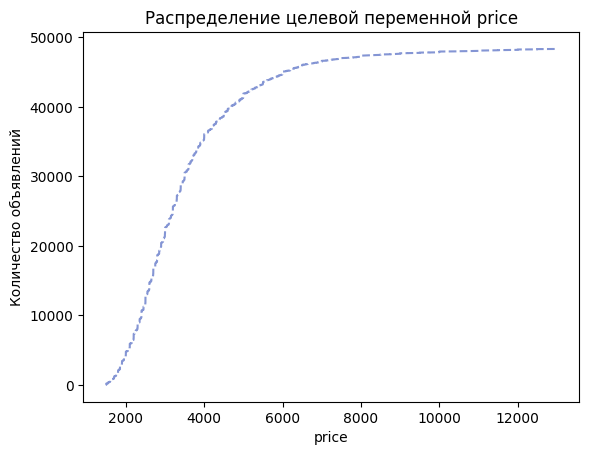

In [382]:
plt.plot(df_train['price'].sort_values(), range(len(df)), color="#8495d4", linestyle="--")
plt.xlabel('price')
plt.ylabel('Количество объявлений')
plt.title('Распределение целевой переменной price')
plt.show()

Как видно из распределения y, оно очень похоже на $f(x) = log_a{x}$ при a > 1, то есть имеет значения, которые формируют тот самый "heavy tail", что делает истинное распределение F(x) не линейным

В таких случаях можно преобразовать целевую переменную y за счет $log_n{ƒ(y)}$, где n - это параметр степени логарифма.Часто n=exp и ƒ(y) = y+1, чтобы избежать $log_n{0}$. Преобразовывают лишь Y_train, Y_test, затем обучают модель. В ходе чего получается предсказание $ \dot y$. Важно отметить, чтобы получить предстказание в изначальной размерности, необходимо провести обратные преобразования, то есть $y_{test} = log_n{ƒ(\dot y)}$

_В отличии от нормализации MinMax, StadardScaler, X никак не меняется, меняется ли y_

На примере n=exp, ƒ(y) = y+1: 
$$
\begin{align*}
\textit y_{train} = ln{(y_{train}) + 1} \\
\end{align*}
$$
 ... Обучение модели (предсказание $\dot y$)... 
$$
\begin{align*}
\textit y_{test} = exp{(\dot y)} - 1\\
\end{align*}
$$

Покажем кодом:

In [383]:
Y_train_log = np.log1p(Y_train) # лучше вычисляет чем log(1+Y_train) на маленьких аргументах

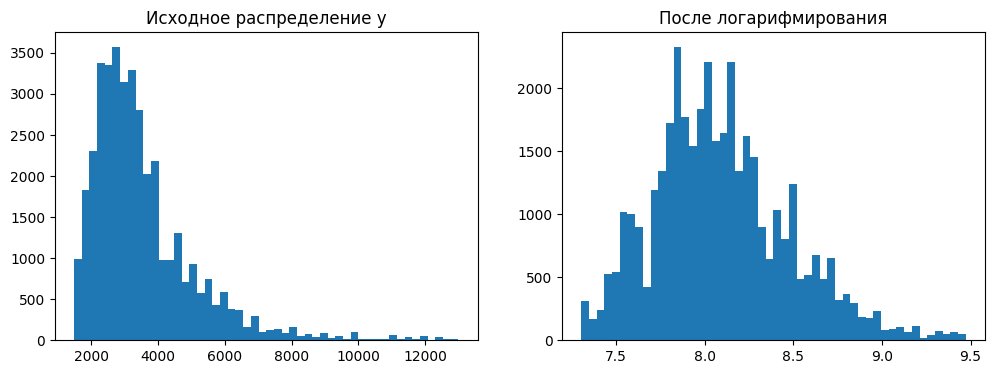

In [384]:
# наглядное преобразование
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.hist(Y_train, bins=50)
plt.title("Исходное распределение y")

plt.subplot(1, 2, 2)
plt.hist(Y_train_log, bins=50)
plt.title("После логарифмирования")

plt.show()

In [400]:
my_lr = Linear_Regression_Gradient_Reg(fit_intercept=True, penalty=None)
lr_en = Linear_Regression_Gradient_Reg(fit_intercept=True, penalty="ElasticNet", lambda_=0.01, alpha=0.5)
lr_L1 = Linear_Regression_Gradient_Reg(fit_intercept=True, penalty="L1", lambda_=0.01, alpha=0.5)
lr_L2 = Linear_Regression_Gradient_Reg(fit_intercept=True, penalty="L2", lambda_=0.01, alpha=0.5)

models = [my_lr, lr_en, lr_L1, lr_L2]

for model in models:
    model.fit(X_train, Y_train_log)

models_pred_train = [np.expm1(model.predict(X_train)) for model in models]      # exp(y) - 1
models_pred_test = [np.expm1(model.predict(X_test)) for model in models]

In [401]:
df_reg_MAE_log = pd.DataFrame(np.nan, index=range(4), columns=["model", "train", "test"])
df_reg_RMSE_log = pd.DataFrame(np.nan, index=range(4), columns=["model", "train", "test"])
df_reg_R2_log = pd.DataFrame(np.nan, index=range(4), columns=["model", "train", "test"])

In [402]:
# MAE df
for i in range(len(models)):  
    model = models[i]  
    df_reg_MAE_log.iloc[i, 0] = f"log {model.penalty}"  if (model.penalty is not None) else f"log {model.__class__.__name__}"
    df_reg_MAE_log.iloc[i, 1] = calculate_MAE(y_true=Y_train, y_pred = models_pred_train[i])
    df_reg_MAE_log.iloc[i, 2] = calculate_MAE(y_true = Y_test, y_pred = models_pred_test[i])

# RMSE df
    df_reg_RMSE_log.iloc[i, 0] = f"log {model.penalty}" if (model.penalty is not None) else f"log {model.__class__.__name__}"
    df_reg_RMSE_log.iloc[i, 1] = calculate_RMSE(y_true=Y_train, y_pred = models_pred_train[i])
    df_reg_RMSE_log.iloc[i, 2] = calculate_RMSE(y_true = Y_test, y_pred = models_pred_test[i])

# R2 df
    df_reg_R2_log.iloc[i, 0] = f"log {model.penalty}" if (model.penalty is not None) else f"log {model.__class__.__name__}"
    df_reg_R2_log.iloc[i, 1] = calculate_r2(y_true=Y_train, y_pred = models_pred_train[i])
    df_reg_R2_log.iloc[i, 2] = calculate_r2(y_true = Y_test, y_pred = models_pred_test[i])


In [406]:
final_MAE_ = pd.concat([final_MAE, df_reg_MAE_log])
final_RMSE_ = pd.concat([final_RMSE, df_reg_RMSE_log])
final_R2_ = pd.concat([final_R2, df_reg_R2_log])

In [407]:
final_MAE_.sort_values(by=["test", "train"], ascending=True)

,model,train,test
18,StandardScaler L1,6.868133e+02,6.859624e+02
17,StandardScaler Linear_Regression_Gradient_Reg,6.869096e+02,6.860457e+02
21,original StandardScaler Lasso,6.866462e+02,6.880924e+02
22,original StandardScaler Ridge,6.869372e+02,6.882725e+02
24,original StandardScaler LinearRegression,6.869384e+02,6.882731e+02
3,original ElasticNet,6.863582e+02,6.884242e+02
4,original Lasso,6.869344e+02,6.888448e+02
1,Linear_Regression_Analytical,6.869384e+02,6.888470e+02
0,LinearRegression,6.869384e+02,6.888470e+02
23,original StandardScaler ElasticNet,7.124194e+02,7.190451e+02


In [408]:
final_RMSE_.sort_values(by=["test", "train"], ascending=True)

,model,train,test
0,LinearRegression,9.971198e+02,9.947191e+02
1,Linear_Regression_Analytical,9.971198e+02,9.947191e+02
4,original Lasso,9.971198e+02,9.947219e+02
24,original StandardScaler LinearRegression,9.971198e+02,9.950407e+02
22,original StandardScaler Ridge,9.971198e+02,9.950414e+02
3,original ElasticNet,9.972891e+02,9.950540e+02
21,original StandardScaler Lasso,9.971502e+02,9.951857e+02
17,StandardScaler Linear_Regression_Gradient_Reg,1.027778e+03,1.026117e+03
18,StandardScaler L1,1.027929e+03,1.026297e+03
23,original StandardScaler ElasticNet,1.042260e+03,1.048818e+03


In [409]:
final_R2_.sort_values(by=["test", "train"], ascending=True)

,model,train,test
25,poly alpha=0.5 Linear_Regression_Gradient_Reg,-inf,-inf
26,poly alpha=0.5 ElasticNet,-inf,-inf
27,poly alpha=0.5 L1,-inf,-inf
28,poly alpha=0.5 L2,-inf,-inf
2,log L1,-1.408207e+11,-4.135946e+04
0,log Linear_Regression_Gradient_Reg,-6.258801e+10,-1.818141e+04
3,log L2,-7.831773e+05,-2.605217e+03
1,log ElasticNet,-1.083078e+03,-3.348424e+01
16,original MinMax LinearRegression,6.019594e-01,-2.570775e+00
14,original MinMax Ridge,6.019216e-01,-2.453781e+00


Логирование показало посредственные результаты, есть модели получше. Возможно, нужно поменять функцию.

## 2) The next trick is outliers. The angle of the linear regression line depends strongly on outliers. And often you should remove these points from !allert! only __training data__. You should explain why they were removed from the training sample only. We recommend that you do this exercise and compare the results

В реальном мире выбросы существуют. Если мы удалим их из тестовых данных, мы создадим искусственные условия, которые не соответствуют реальности.

1) Модель учится общим закономерностям, а не подстраивается под аномалии. В реальности мы хотим, чтобы модель хорошо предсказывала ТИПИЧНЫЕ случаи

2. Тестовые же данные должны представлять реальный мир. В реальном мире выбросы существуют, и модель должна уметь с ними справляться

3. Если убрать выбросы из теста, мы получим завышенные метрики. Но в реальности модель встретит такие же выбросы!

In [ ]:
# выбросы уже были удалены в part 2 :)


## 3) It will also be a useful exercise to implement a linear regression algorithm with batch and mini-batch training or analytical solution (as mentioned in 4.1)

Аналитическое решение было реализовано в 4.1 (_Linear_Regression_Analytical class_). Результаты предствлены ниже:

In [410]:
display(df_MAE[df_MAE["model"] == "Linear_Regression_Analytical"])

,model,train,test
1,Linear_Regression_Analytical,686.938386,688.846978


In [411]:
display(df_RMSE[df_RMSE["model"] == "Linear_Regression_Analytical"])

,model,train,test
1,Linear_Regression_Analytical,997.119843,994.719067


In [412]:
display(df_R2[df_R2["model"] == "Linear_Regression_Analytical"])

,model,train,test
1,Linear_Regression_Analytical,0.601959,0.616389
